In [134]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import vincenty
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#reading the files TRI data, Zillow All Homes data, zipcode centroid files

In [135]:

data_tri_2015 = pd.read_csv('TRI_2015_NC.csv')
data_zillow_AllHomes = pd.read_csv('Zip_Zhvi_AllHomes.csv')
data_region_centroids = pd.read_csv('zipcode/zipcode.csv')

In [136]:
data_columns = ['RegionName','2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12']
data_zillow_AllHomes = data_zillow_AllHomes.loc[:,(data_columns)]

In [137]:
data_tri_2015.head()

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,8.4_RECYCLING_ON-SITE,8.5_RECYCLING_OFF-SITE,8.6_TREATMENT_ON-SITE,8.7_TREATMENT_OFF-SITE,PROD._WASTE_(8.1_THRU_8.7),8.8_ONE-TIME_RELEASE,PROD_RATIO_OR_ACTIVITY,8.9_PRODUCTION_RATIO,PARENT_COMPANY_NAME,PARENT_COMPANY_DB_NUMBER
0,2015,27709JMCSNONEIN,1.100120e+11,JMC (USA) INC,ONE INNOVATION DR,RESEARCH TRIANGLE PARK,DURHAM,NC,27709,NaN,...,0.0,0.0,0.0,0.0,0.00,0.0,NaN,0.00,JAPAN METALS & CHEMICALS CO LTD,NaN
1,2015,2803WBRLCM5CRRE,1.100460e+11,BORAL COMPOSITE INC,500 CORRELL ST,EAST SPENCER,ROWAN,NC,28039,NaN,...,0.0,0.0,0.0,0.0,140.00,NaN,PRODUCTION,1.12,BORAL USA,NaN
2,2015,28111TLDYN2020A,1.100000e+11,ALLVAC - MONROE PLANT,2020 ASHCRAFT AVE,MONROE,UNION,NC,28110,NaN,...,0.0,0.0,0.0,0.0,77.33,NaN,PRODUCTION,1.10,ALLEGHENY TECHNOLOGIES INC,949262737.0
3,2015,28328CMPBL224FA,1.100000e+11,CAMPBELL OIL & GAS CO,224 FAISON HWY,CLINTON,SAMPSON,NC,28328,NaN,...,0.0,0.0,0.0,0.0,0.00,NaN,ACTIVITY,1.00,CAMPBELL OIL & GAS CO,NaN
4,2015,28456FDRLPRIEGE,1.100100e+11,INTERNATIONAL PAPER RIEGELWOOD MILL,865 JOHN L.RIEGEL RD,RIEGELWOOD,COLUMBUS,NC,28456,NaN,...,0.0,0.0,0.0,0.0,37080.00,NaN,PRODUCTION,0.97,INTERNATIONAL PAPER CO,1316561.0


In [138]:
data_zillow_AllHomes.rename(columns={'RegionName':'ZIP'},inplace=True)

In [139]:
data_region_centroids.rename(columns = {'zip':'ZIP','latitude':'CENTROID_LATITUDE','longitude':'CENTROID_LONGITUDE'},inplace=True)

In [140]:
data_columns1 = ['ZIP','CENTROID_LATITUDE','CENTROID_LONGITUDE']
data_region_centroids = data_region_centroids.loc[:,(data_columns1)]

In [141]:
data_zillow_AllHomes.head()

,ZIP,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,10025,909900,911000,907100,902400,905800,911900,923400,946800,972400,981100,984600,994300
1,60657,308800,306600,306500,308700,310000,309900,310200,309800,310300,311800,312600,311700
2,60614,368700,363400,357600,357900,359700,359100,358800,361700,368600,379600,386900,390400
3,79936,111700,111700,111600,111500,111500,111500,111700,111800,111800,111800,111600,111200
4,60640,192200,191600,192600,195600,197100,195600,193400,192500,193400,195200,195900,196000


In [142]:
data_common_tri_zillow = pd.merge(data_tri_2015,data_zillow_AllHomes)

In [143]:
data_common_tri_zillow.head()

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
0,2015,28111TLDYN2020A,1.100000e+11,ALLVAC - MONROE PLANT,2020 ASHCRAFT AVE,MONROE,UNION,NC,28110,NaN,...,153900,154500,154900,155100,155400,156200,157300,158500,159200,159700
1,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,153900,154500,154900,155100,155400,156200,157300,158500,159200,159700
2,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,153900,154500,154900,155100,155400,156200,157300,158500,159200,159700
3,2015,2811WTLLVC375AL,1.100190e+11,ATI ALLVAC - BAKERS SITE,3750 ALLOY WAY,MONROE,UNION,NC,28110,NaN,...,153900,154500,154900,155100,155400,156200,157300,158500,159200,159700
4,2015,2811WCNCRT119NS,1.100010e+11,CONCRETE SUPPLY CO LLC-MONROE,1109 N SUTHERLAND RD,MONROE,UNION,NC,28110,NaN,...,153900,154500,154900,155100,155400,156200,157300,158500,159200,159700


In [144]:
data_common_tri_zillow_centroid = pd.merge(data_common_tri_zillow,data_region_centroids)

In [145]:
data_common_tri_zillow_centroid.head()

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,CENTROID_LATITUDE,CENTROID_LONGITUDE
0,2015,28111TLDYN2020A,1.100000e+11,ALLVAC - MONROE PLANT,2020 ASHCRAFT AVE,MONROE,UNION,NC,28110,NaN,...,154900,155100,155400,156200,157300,158500,159200,159700,35.031947,-80.56002
1,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,154900,155100,155400,156200,157300,158500,159200,159700,35.031947,-80.56002
2,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,154900,155100,155400,156200,157300,158500,159200,159700,35.031947,-80.56002
3,2015,2811WTLLVC375AL,1.100190e+11,ATI ALLVAC - BAKERS SITE,3750 ALLOY WAY,MONROE,UNION,NC,28110,NaN,...,154900,155100,155400,156200,157300,158500,159200,159700,35.031947,-80.56002
4,2015,2811WCNCRT119NS,1.100010e+11,CONCRETE SUPPLY CO LLC-MONROE,1109 N SUTHERLAND RD,MONROE,UNION,NC,28110,NaN,...,154900,155100,155400,156200,157300,158500,159200,159700,35.031947,-80.56002


In [146]:
def calculate_distance(df):
    return vincenty((df['LATITUDE'],df['LONGITUDE']),(df['CENTROID_LATITUDE'],df['CENTROID_LONGITUDE'])).miles
    

In [147]:
data_common_tri_zillow_centroid['DIST_FROM_CENTROID']=data_common_tri_zillow_centroid.apply(calculate_distance,axis=1)



In [148]:
data_common_tri_zillow_centroid[['LATITUDE','LONGITUDE','CENTROID_LATITUDE','CENTROID_LONGITUDE','DIST_FROM_CENTROID']]

,LATITUDE,LONGITUDE,CENTROID_LATITUDE,CENTROID_LONGITUDE,DIST_FROM_CENTROID
0,34.985480,-80.517139,35.031947,-80.56002,4.021916
1,34.995550,-80.497710,35.031947,-80.56002,4.333998
2,34.995550,-80.497710,35.031947,-80.56002,4.333998
3,35.018030,-80.612762,35.031947,-80.56002,3.140923
4,34.995580,-80.527970,35.031947,-80.56002,3.096601
5,35.025980,-80.604130,35.031947,-80.56002,2.534804
6,34.985480,-80.517139,35.031947,-80.56002,4.021916
7,34.995550,-80.497710,35.031947,-80.56002,4.333998
8,34.997360,-80.560010,35.031947,-80.56002,2.384270
9,34.987520,-80.497780,35.031947,-80.56002,4.673424


In [149]:
data_common_tri_zillow_centroid

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,CENTROID_LATITUDE,CENTROID_LONGITUDE,DIST_FROM_CENTROID
0,2015,28111TLDYN2020A,1.100000e+11,ALLVAC - MONROE PLANT,2020 ASHCRAFT AVE,MONROE,UNION,NC,28110,NaN,...,155100,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,4.021916
1,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,155100,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,4.333998
2,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,155100,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,4.333998
3,2015,2811WTLLVC375AL,1.100190e+11,ATI ALLVAC - BAKERS SITE,3750 ALLOY WAY,MONROE,UNION,NC,28110,NaN,...,155100,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,3.140923
4,2015,2811WCNCRT119NS,1.100010e+11,CONCRETE SUPPLY CO LLC-MONROE,1109 N SUTHERLAND RD,MONROE,UNION,NC,28110,NaN,...,155100,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,3.096601
5,2015,28110PRNTW2011R,1.100000e+11,OMNOVA SOLUTIONS INC,2011 ROCKY RIVER RD,MONROE,UNION,NC,28110,NaN,...,155100,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,2.534804
6,2015,28111TLDYN2020A,1.100000e+11,ALLVAC - MONROE PLANT,2020 ASHCRAFT AVE,MONROE,UNION,NC,28110,NaN,...,155100,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,4.021916
7,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,155100,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,4.333998
8,2015,28110CNSLD780PA,1.100000e+11,CONSOLIDATED METCO INC,780 PATTON AVE,MONROE,UNION,NC,28110,NaN,...,155100,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,2.384270
9,2015,28110LDWGN2806M,1.100010e+11,CONN-SELMER INC LUDWIG FACILITY,2806 MASON ST,MONROE,UNION,NC,28110,NaN,...,155100,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,4.673424


In [ ]:
cols=['2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12']
data_common_tri_zillow_centroid['AVG_PRICE'] = data_common_tri_zillow_centroid[cols].mean(axis=1)
data_common_tri_zillow_centroid

In [185]:
data_within_1_mile=data_common_tri_zillow_centroid[data_common_tri_zillow_centroid.DIST_FROM_CENTROID<1]

In [170]:
data_within_1_mile

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,CENTROID_LATITUDE,CENTROID_LONGITUDE,DIST_FROM_CENTROID,AVG_PRICE
103,2015,28682DKNRG8320E,1.100000e+11,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,8320 E NC 150 HWY,TERRELL,CATAWBA,NC,28682,NaN,...,354000,351500,350500,353800,360400,365400,35.585074,-80.96141,0.891630,351033.333333
104,2015,28682DKNRG8320E,1.100000e+11,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,8320 E NC 150 HWY,TERRELL,CATAWBA,NC,28682,NaN,...,354000,351500,350500,353800,360400,365400,35.585074,-80.96141,0.891630,351033.333333
105,2015,28682DKNRG8320E,1.100000e+11,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,8320 E NC 150 HWY,TERRELL,CATAWBA,NC,28682,NaN,...,354000,351500,350500,353800,360400,365400,35.585074,-80.96141,0.891630,351033.333333
106,2015,28682DKNRG8320E,1.100000e+11,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,8320 E NC 150 HWY,TERRELL,CATAWBA,NC,28682,NaN,...,354000,351500,350500,353800,360400,365400,35.585074,-80.96141,0.891630,351033.333333
107,2015,28682DKNRG8320E,1.100000e+11,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,8320 E NC 150 HWY,TERRELL,CATAWBA,NC,28682,NaN,...,354000,351500,350500,353800,360400,365400,35.585074,-80.96141,0.891630,351033.333333
108,2015,28682DKNRG8320E,1.100000e+11,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,8320 E NC 150 HWY,TERRELL,CATAWBA,NC,28682,NaN,...,354000,351500,350500,353800,360400,365400,35.585074,-80.96141,0.891630,351033.333333
109,2015,28682DKNRG8320E,1.100000e+11,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,8320 E NC 150 HWY,TERRELL,CATAWBA,NC,28682,NaN,...,354000,351500,350500,353800,360400,365400,35.585074,-80.96141,0.891630,351033.333333
110,2015,28682DKNRG8320E,1.100000e+11,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,8320 E NC 150 HWY,TERRELL,CATAWBA,NC,28682,NaN,...,354000,351500,350500,353800,360400,365400,35.585074,-80.96141,0.891630,351033.333333
111,2015,28682DKNRG8320E,1.100000e+11,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,8320 E NC 150 HWY,TERRELL,CATAWBA,NC,28682,NaN,...,354000,351500,350500,353800,360400,365400,35.585074,-80.96141,0.891630,351033.333333
112,2015,28682DKNRG8320E,1.100000e+11,DUKE ENERGY CAROLINAS LLC - MARSHALL STEAM STA...,8320 E NC 150 HWY,TERRELL,CATAWBA,NC,28682,NaN,...,354000,351500,350500,353800,360400,365400,35.585074,-80.96141,0.891630,351033.333333


/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


TRI_FACILITY_ID
27013FRGHTHWY70    Axes(0.125,0.125;0.775x0.755)
27101TRCRP1690L    Axes(0.125,0.125;0.775x0.755)
27204PGHLC701MC    Axes(0.125,0.125;0.775x0.755)
2721WCNCRT225HA    Axes(0.125,0.125;0.775x0.755)
27233NDSTR6924H    Axes(0.125,0.125;0.775x0.755)
27235CRLNS935WM    Axes(0.125,0.125;0.775x0.755)
27260MRCNM500MA    Axes(0.125,0.125;0.775x0.755)
27261MRSHF1001S    Axes(0.125,0.125;0.775x0.755)
27262PRCHM1670E    Axes(0.125,0.125;0.775x0.755)
2726WRGSHG46TML    Axes(0.125,0.125;0.775x0.755)
27282CHMCN108OA    Axes(0.125,0.125;0.775x0.755)
27284HGHLN215DR    Axes(0.125,0.125;0.775x0.755)
2728WTKNRP3518D    Axes(0.125,0.125;0.775x0.755)
27360HRCRS125SE    Axes(0.125,0.125;0.775x0.755)
27360THMSM1024R    Axes(0.125,0.125;0.775x0.755)
27377NGNRD1239R    Axes(0.125,0.125;0.775x0.755)
27403DSTNC1025H    Axes(0.125,0.125;0.775x0.755)
27403MRFLX2110H    Axes(0.125,0.125;0.775x0.755)
2750WPLLTN126TH    Axes(0.125,0.125;0.775x0.755)
2751WRGSCH291GU    Axes(0.125,0.125;0.775x0.755)
2756

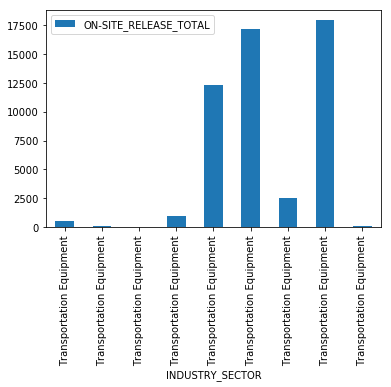

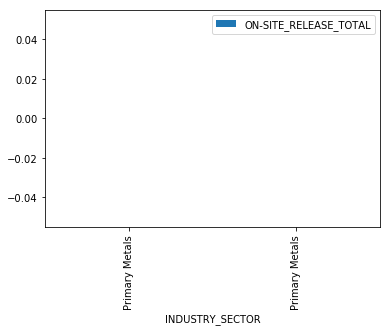

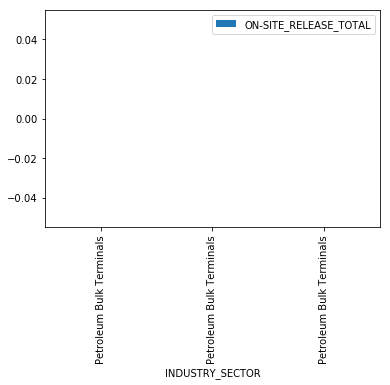

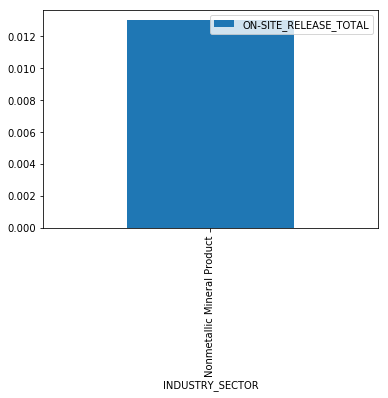

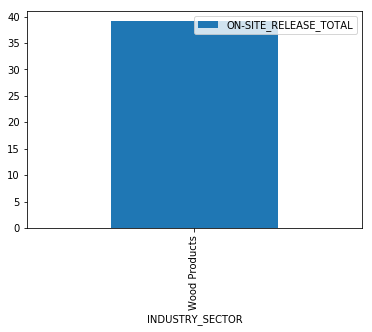

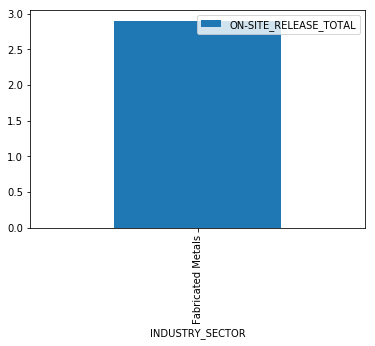

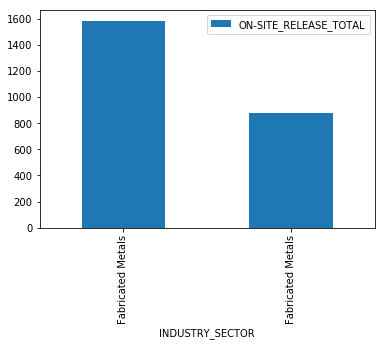

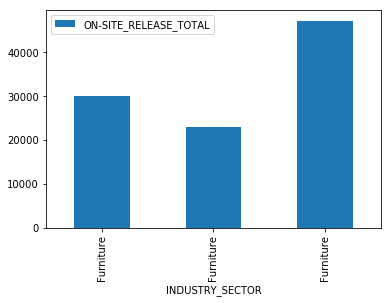

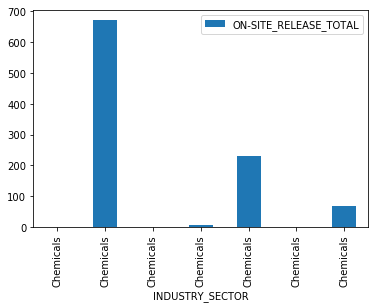

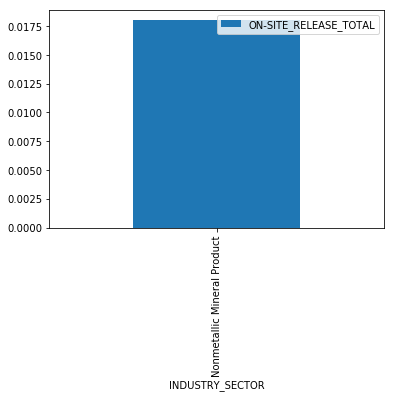

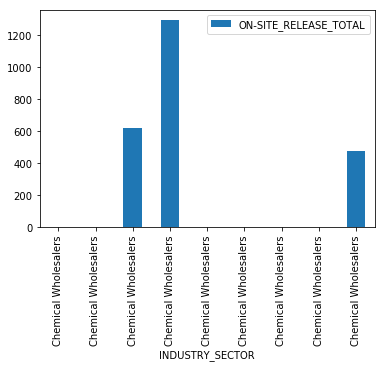

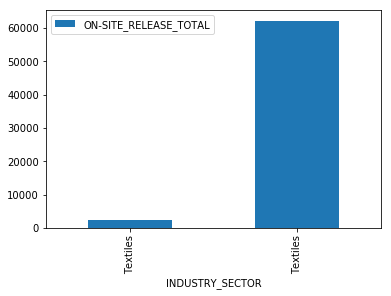

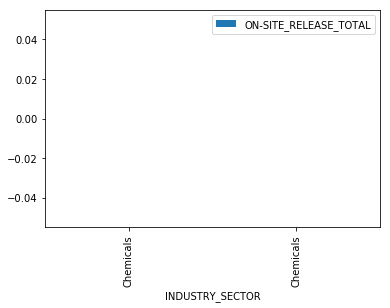

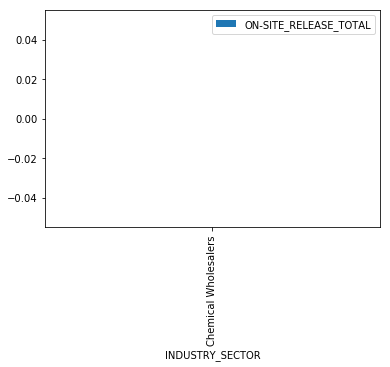

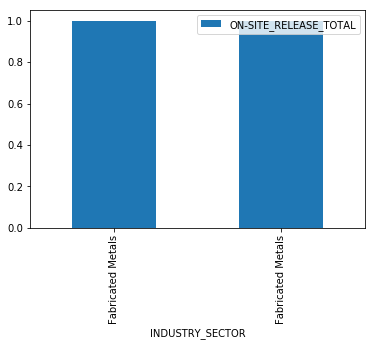

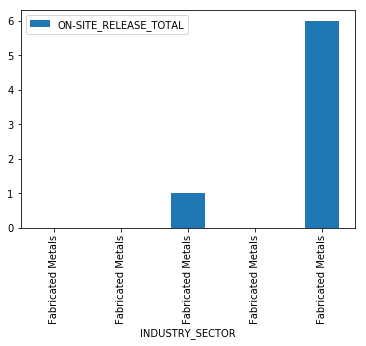

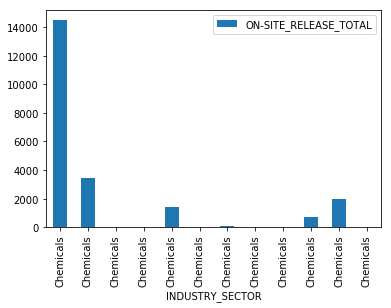

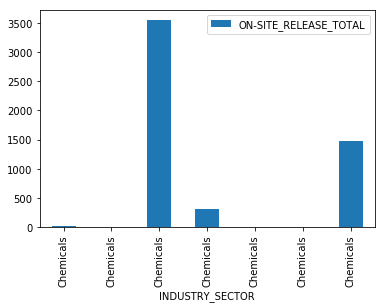

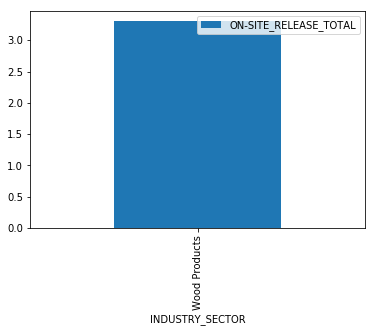

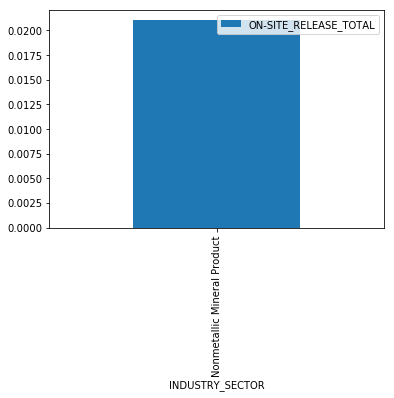

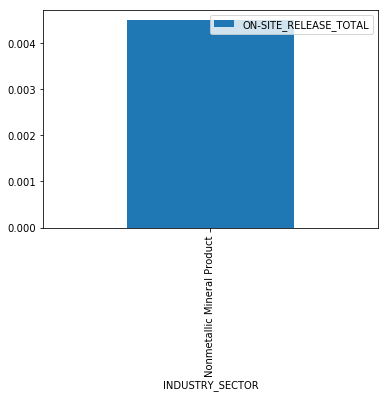

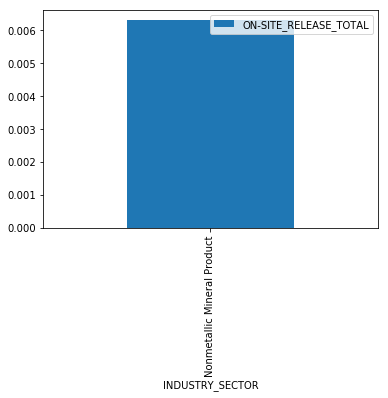

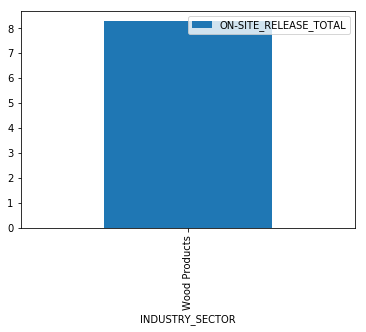

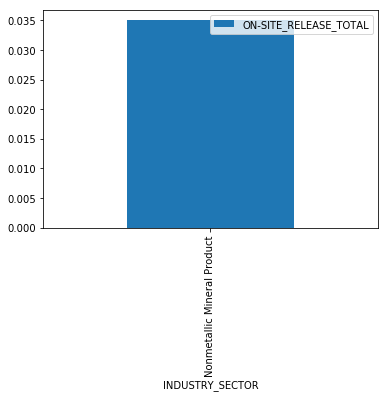

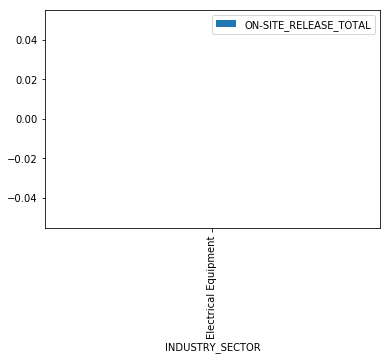

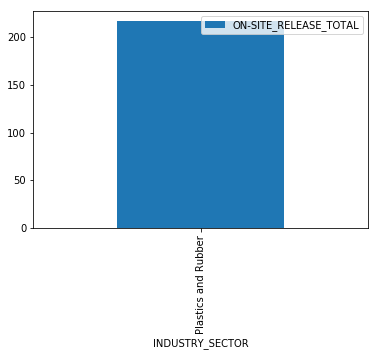

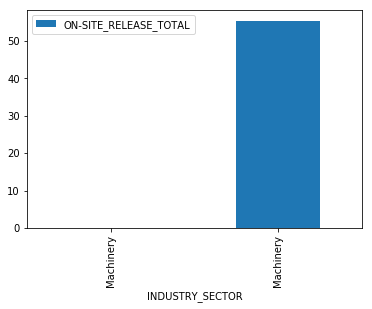

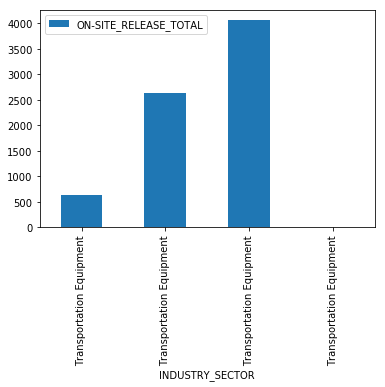

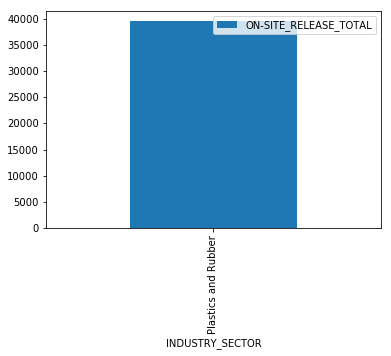

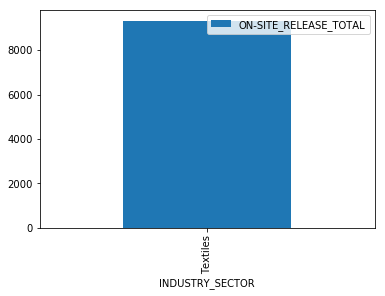

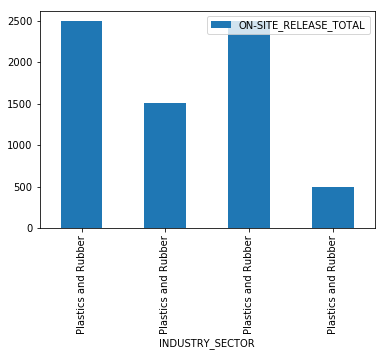

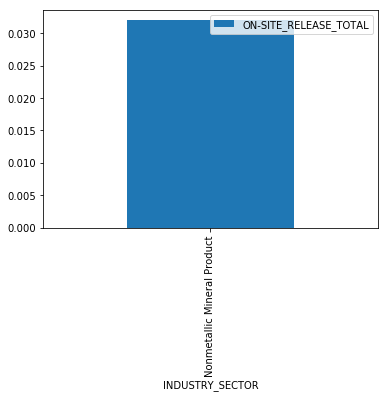

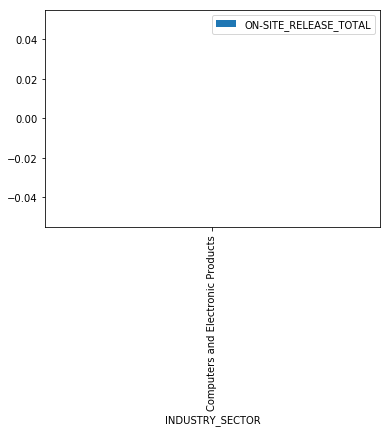

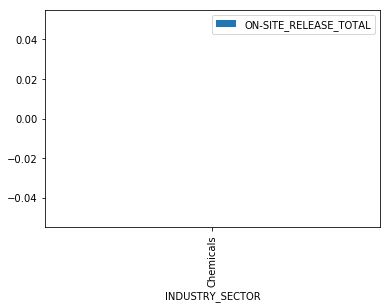

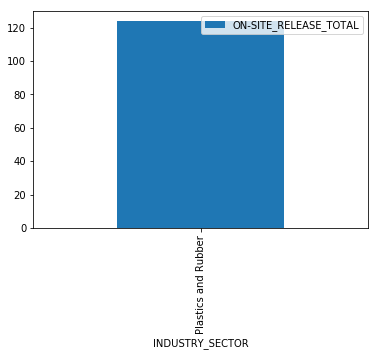

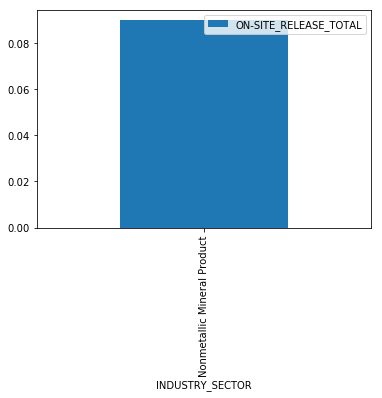

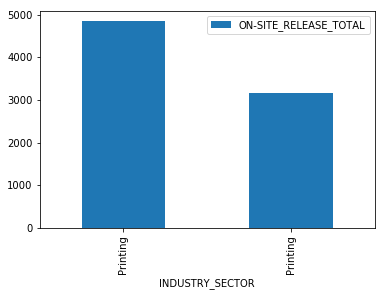

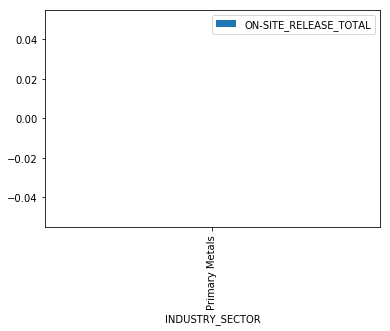

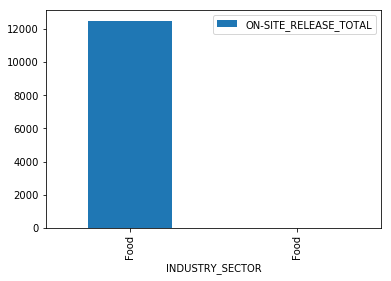

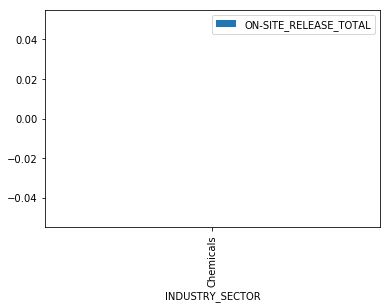

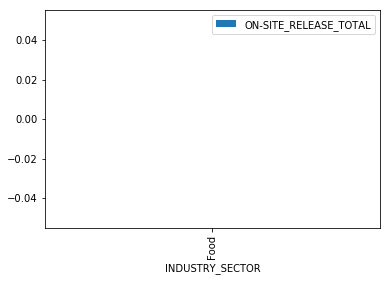

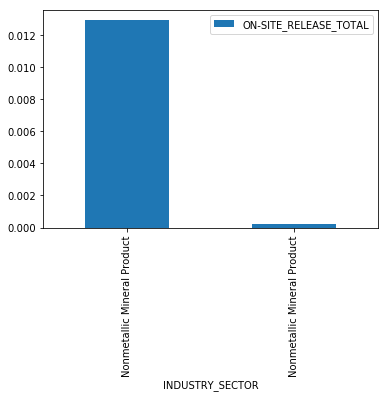

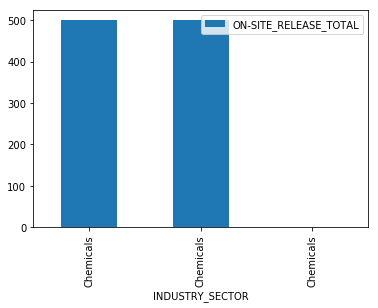

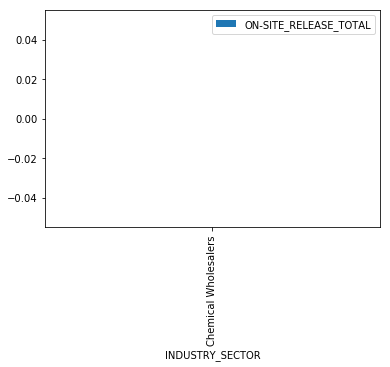

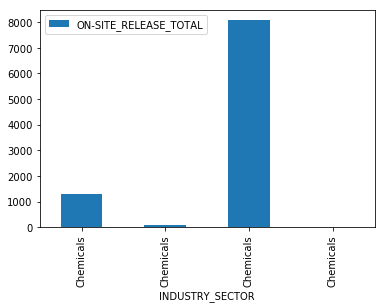

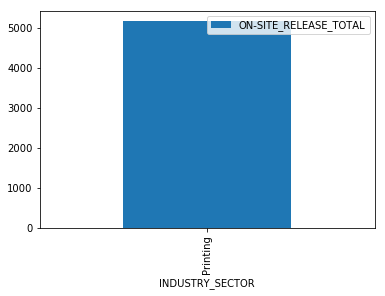

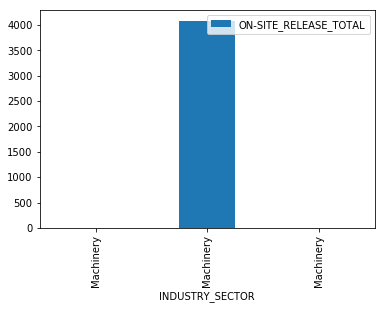

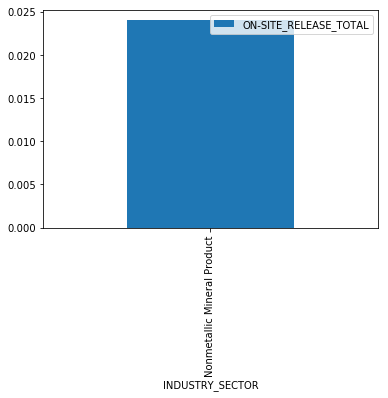

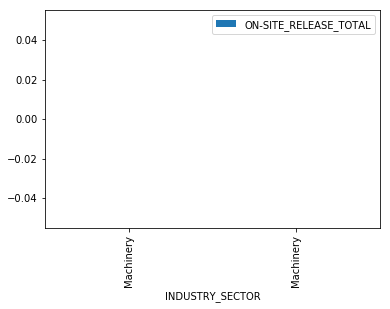

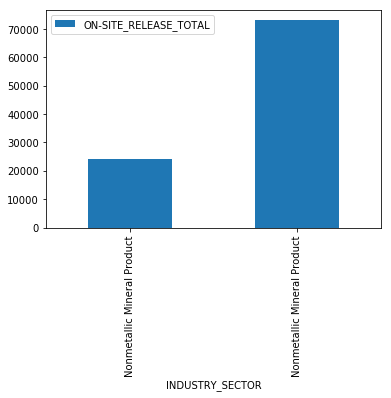

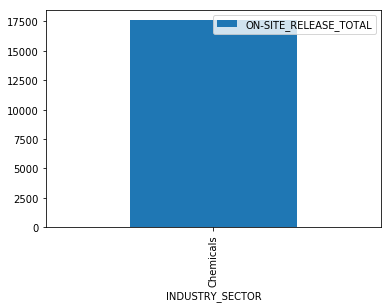

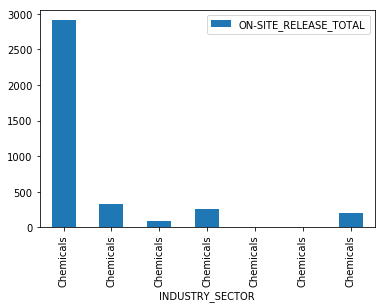

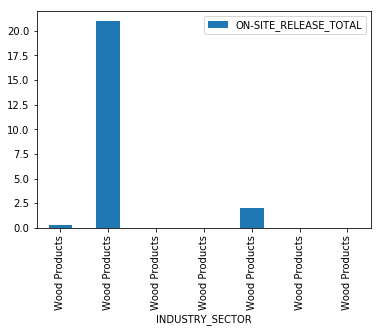

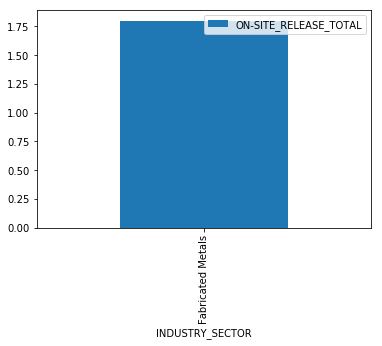

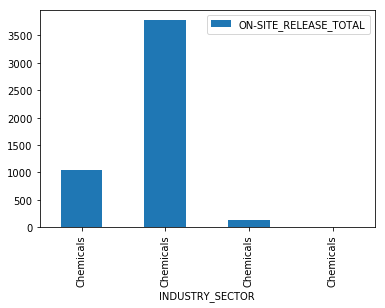

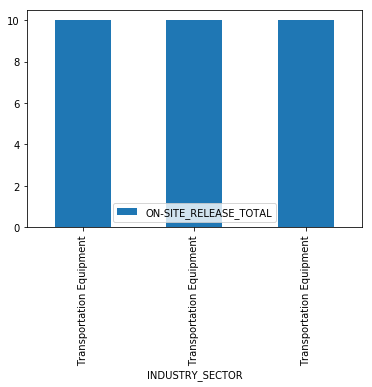

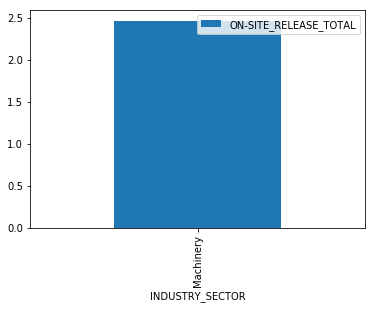

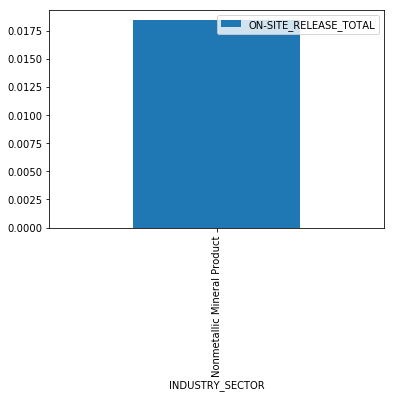

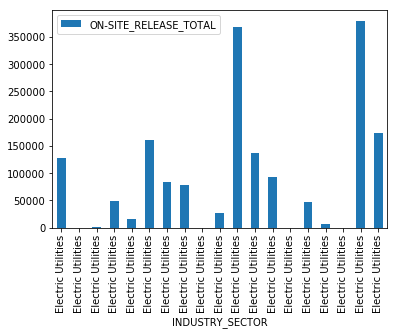

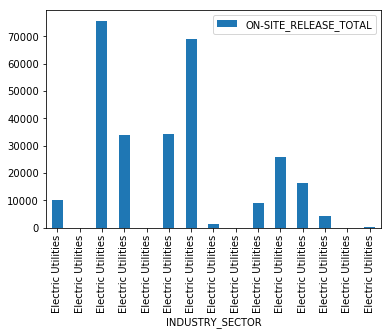

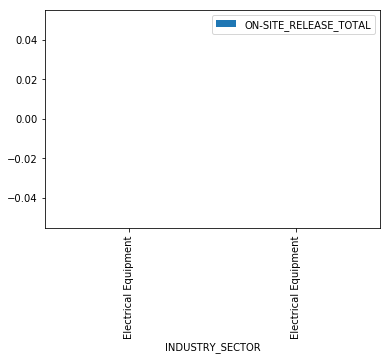

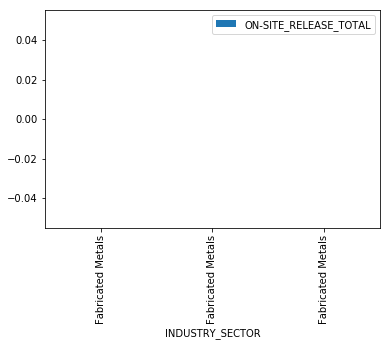

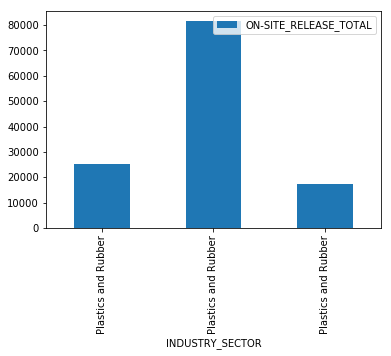

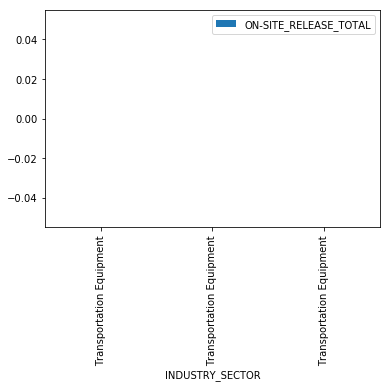

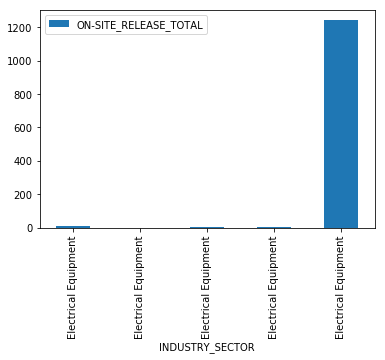

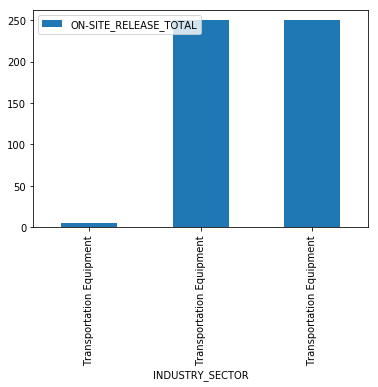

In [171]:
data_within_1_mile.groupby('TRI_FACILITY_ID').plot(x='INDUSTRY_SECTOR',y='ON-SITE_RELEASE_TOTAL',kind = 'bar')

/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


TRI_FACILITY_ID
27013FRGHTHWY70    Axes(0.125,0.125;0.775x0.755)
27101TRCRP1690L    Axes(0.125,0.125;0.775x0.755)
27204PGHLC701MC    Axes(0.125,0.125;0.775x0.755)
2721WCNCRT225HA    Axes(0.125,0.125;0.775x0.755)
27233NDSTR6924H    Axes(0.125,0.125;0.775x0.755)
27235CRLNS935WM    Axes(0.125,0.125;0.775x0.755)
27260MRCNM500MA    Axes(0.125,0.125;0.775x0.755)
27261MRSHF1001S    Axes(0.125,0.125;0.775x0.755)
27262PRCHM1670E    Axes(0.125,0.125;0.775x0.755)
2726WRGSHG46TML    Axes(0.125,0.125;0.775x0.755)
27282CHMCN108OA    Axes(0.125,0.125;0.775x0.755)
27284HGHLN215DR    Axes(0.125,0.125;0.775x0.755)
2728WTKNRP3518D    Axes(0.125,0.125;0.775x0.755)
27360HRCRS125SE    Axes(0.125,0.125;0.775x0.755)
27360THMSM1024R    Axes(0.125,0.125;0.775x0.755)
27377NGNRD1239R    Axes(0.125,0.125;0.775x0.755)
27403DSTNC1025H    Axes(0.125,0.125;0.775x0.755)
27403MRFLX2110H    Axes(0.125,0.125;0.775x0.755)
2750WPLLTN126TH    Axes(0.125,0.125;0.775x0.755)
2751WRGSCH291GU    Axes(0.125,0.125;0.775x0.755)
2756

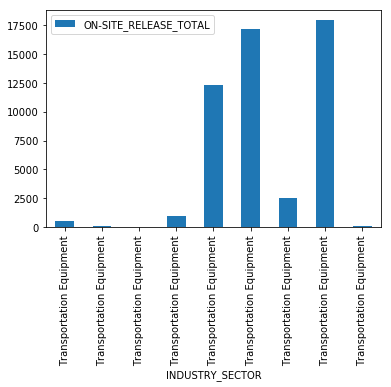

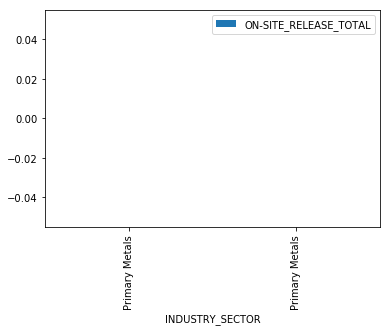

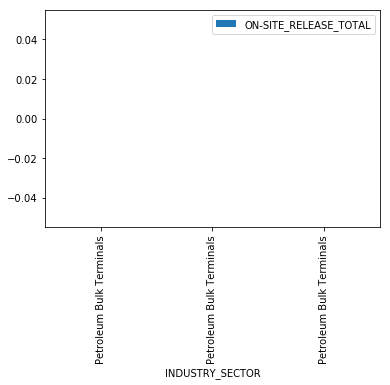

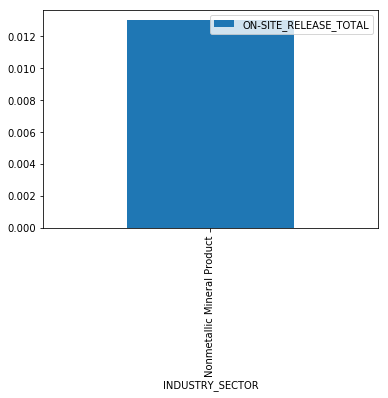

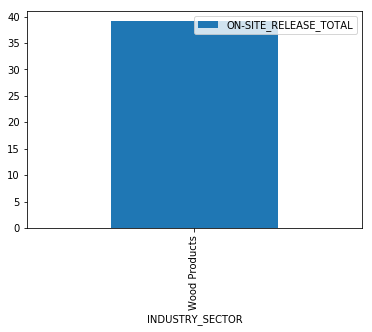

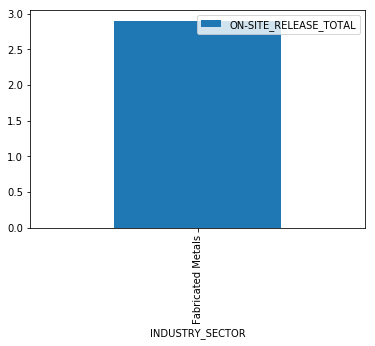

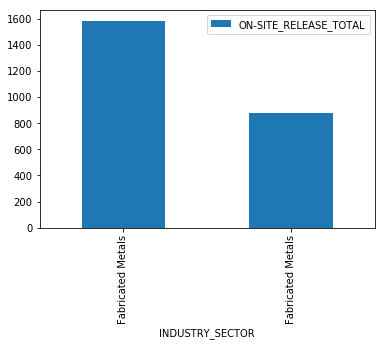

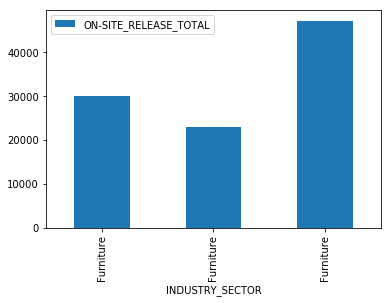

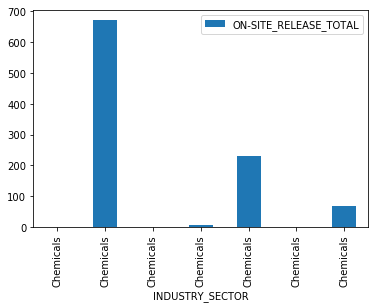

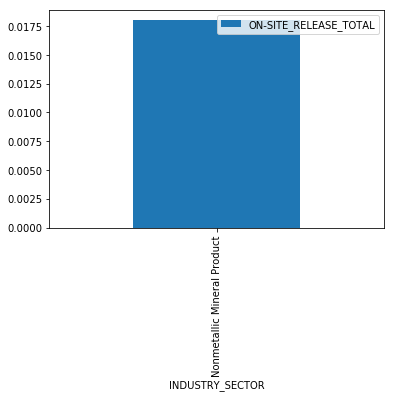

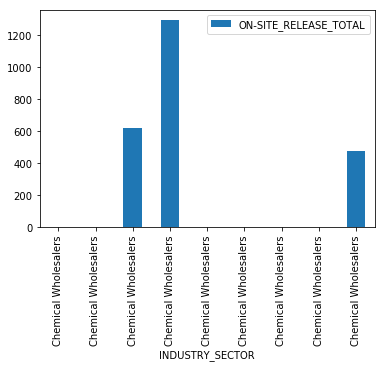

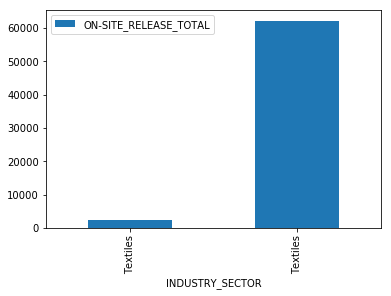

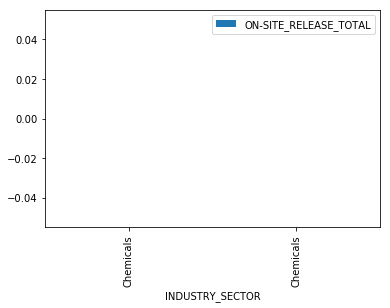

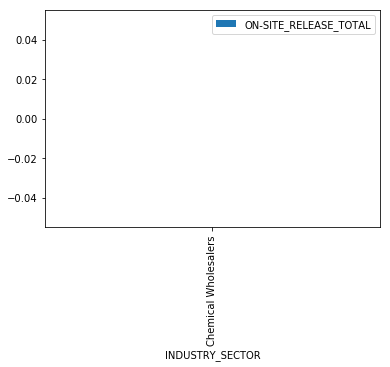

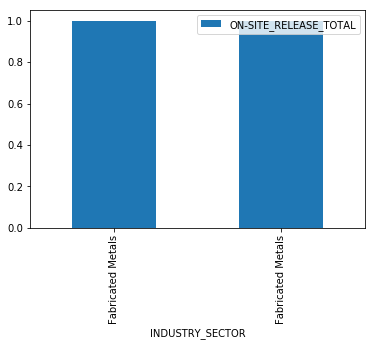

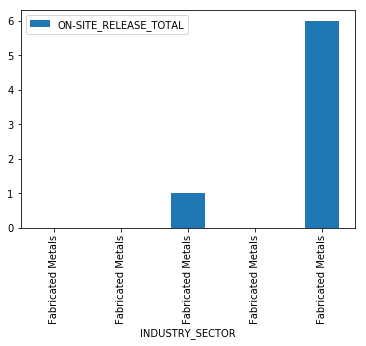

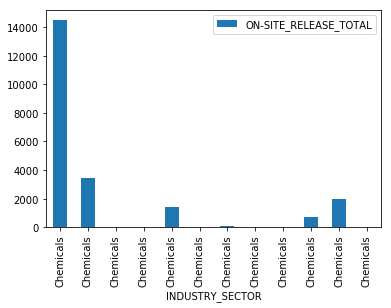

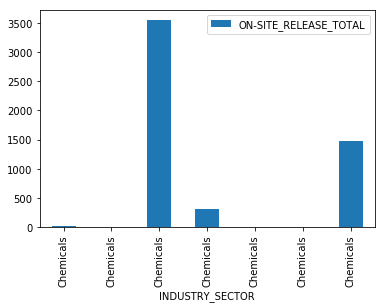

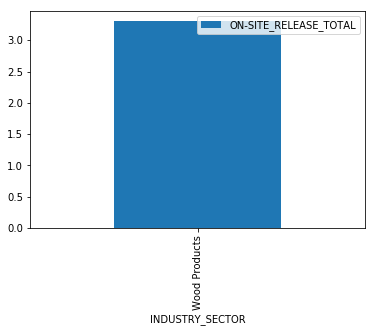

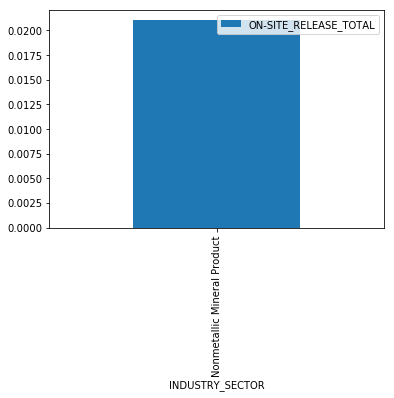

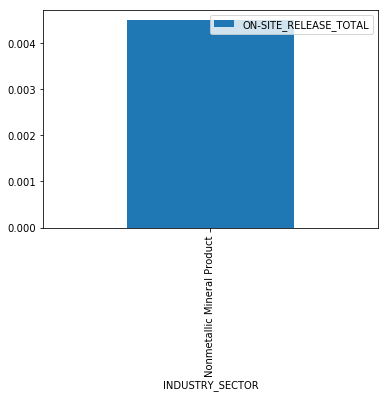

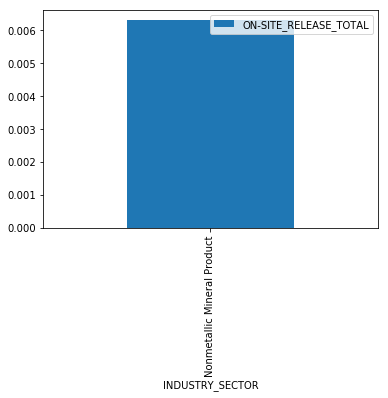

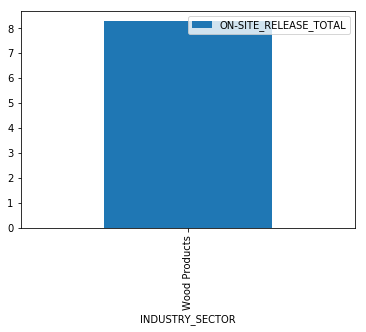

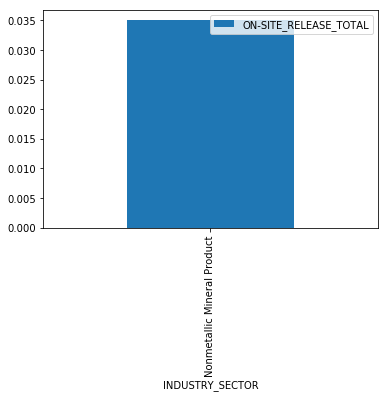

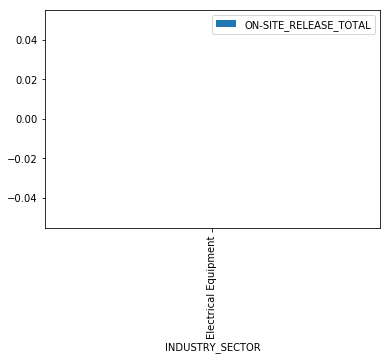

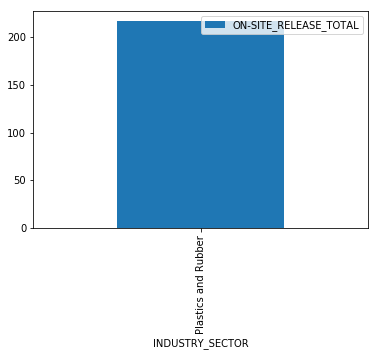

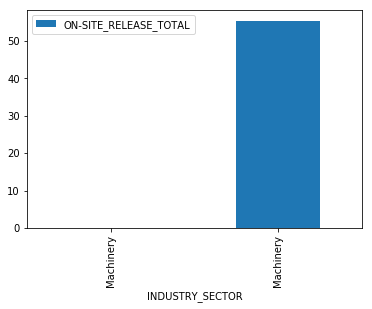

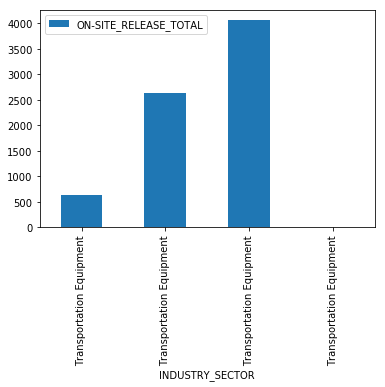

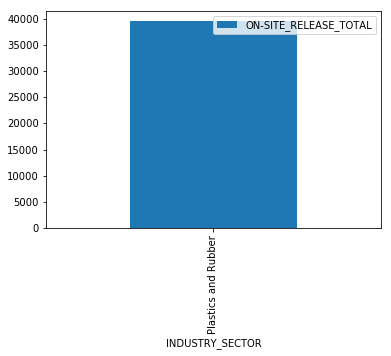

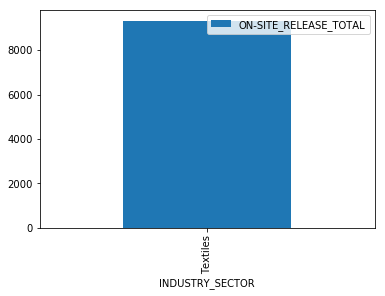

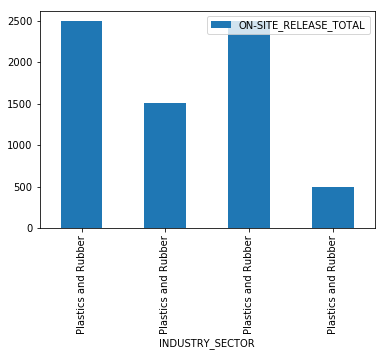

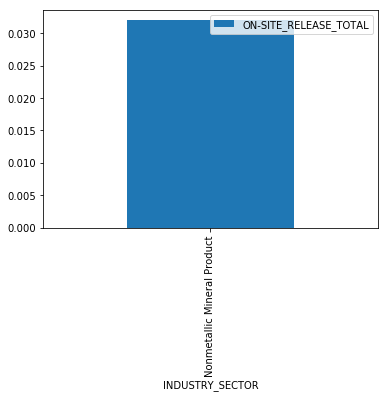

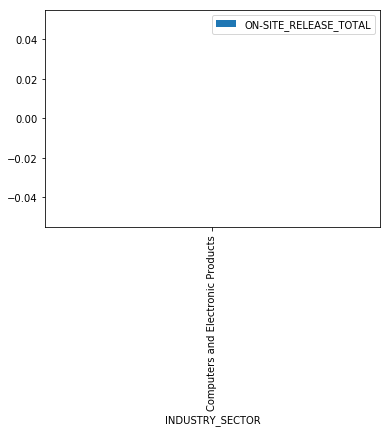

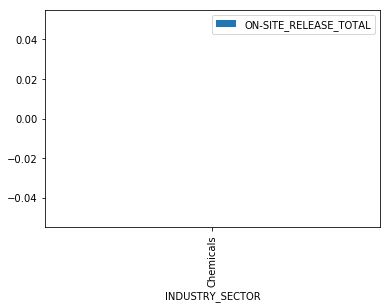

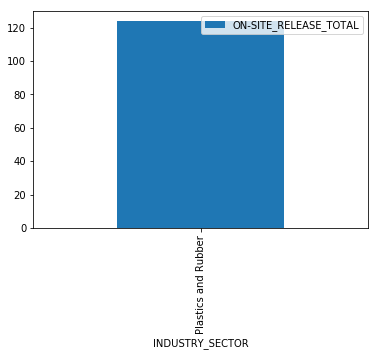

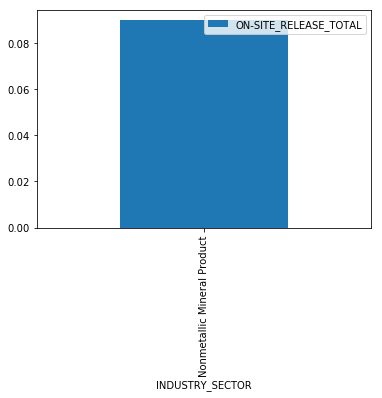

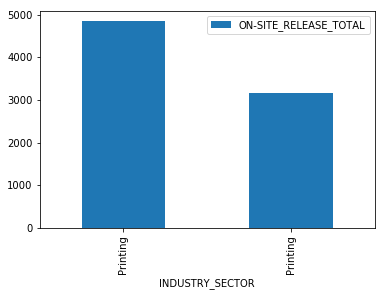

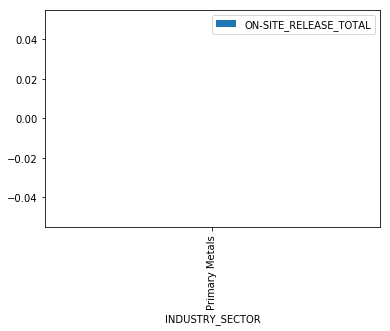

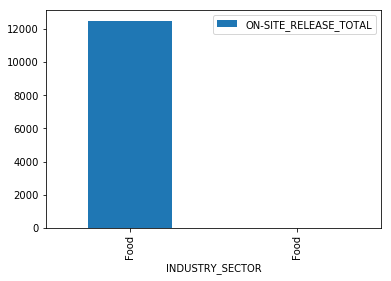

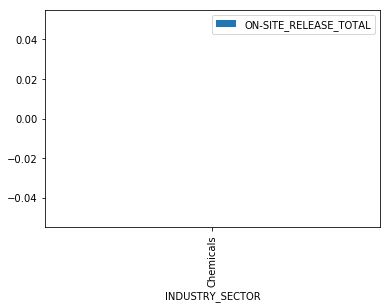

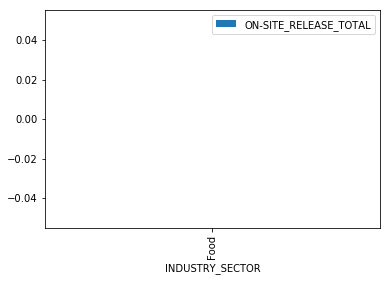

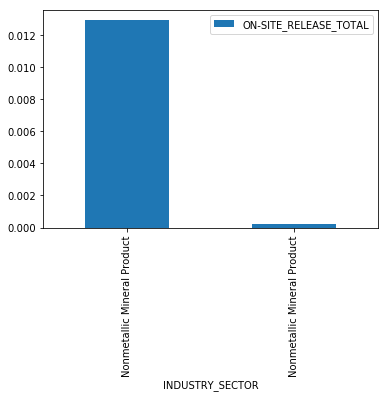

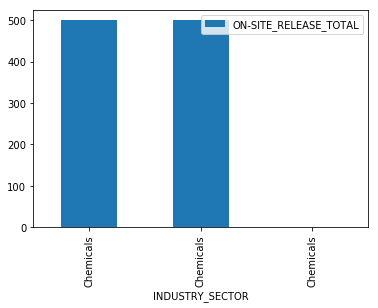

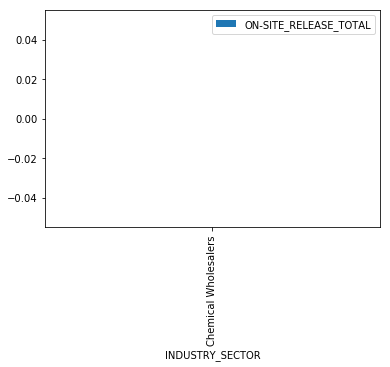

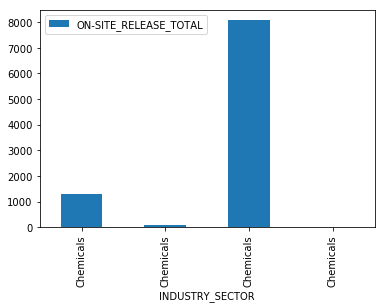

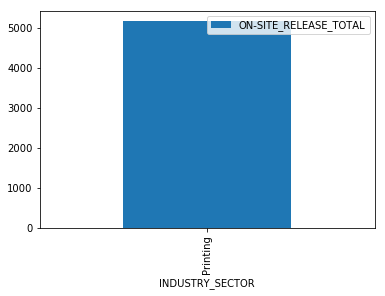

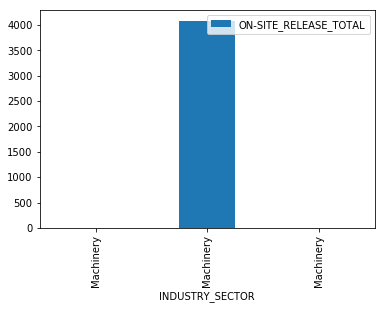

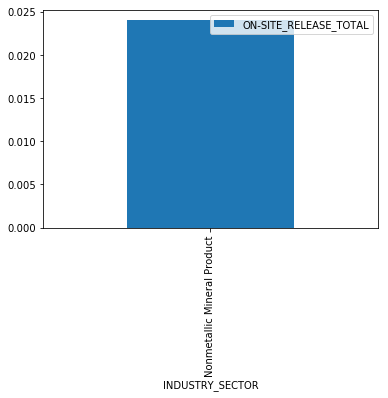

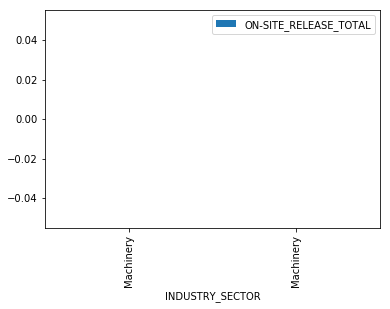

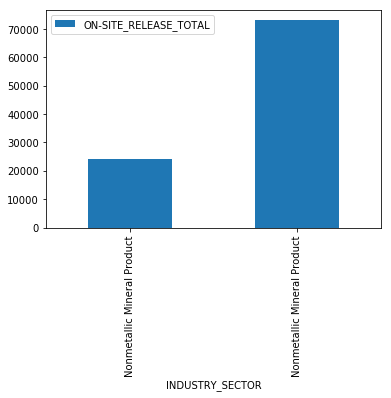

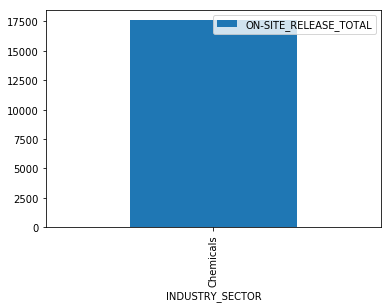

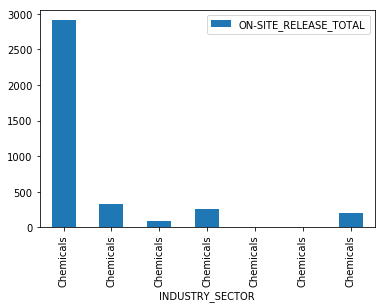

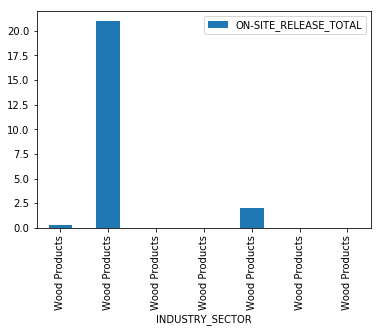

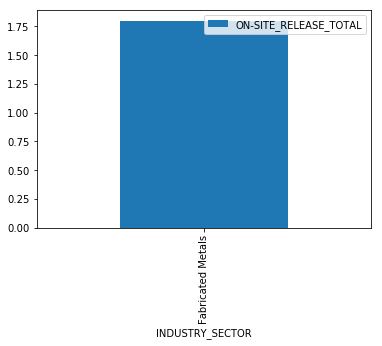

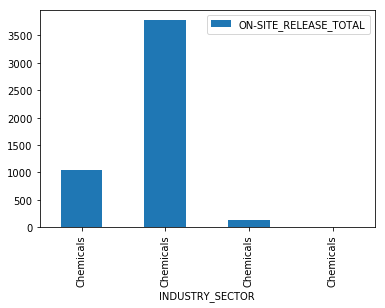

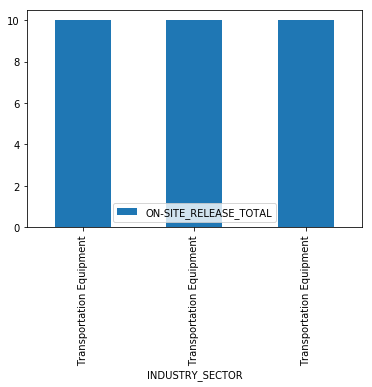

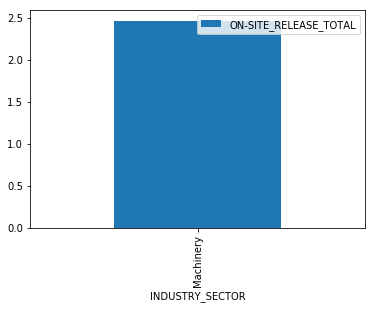

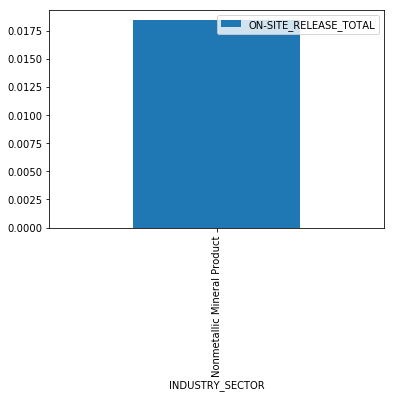

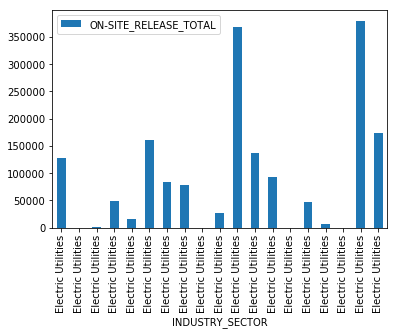

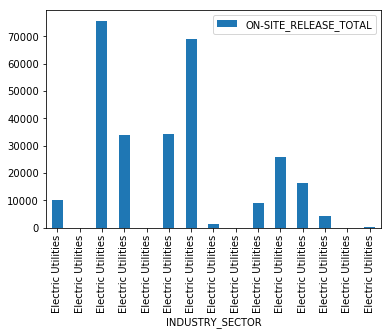

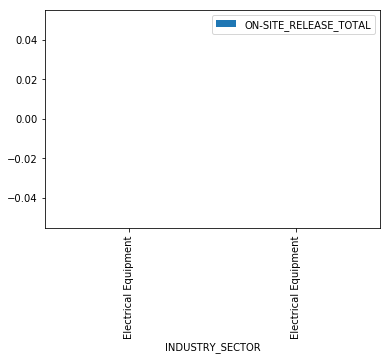

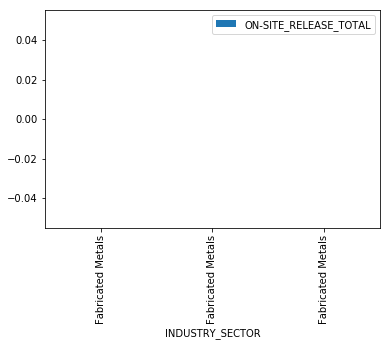

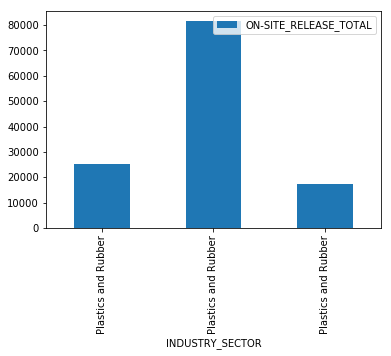

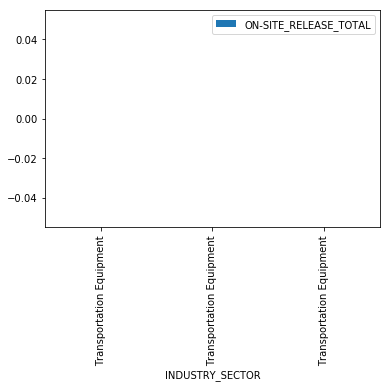

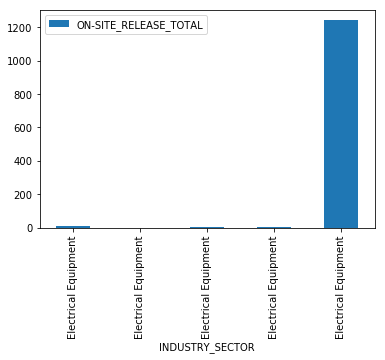

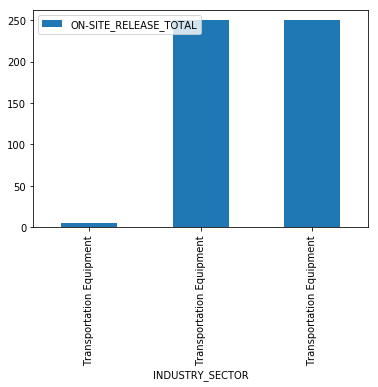

In [172]:
data_within_1_mile.groupby('TRI_FACILITY_ID').plot(x='INDUSTRY_SECTOR',y='ON-SITE_RELEASE_TOTAL',kind = 'bar')

,YEAR,TRI_FACILITY_ID,FRS_ID,FACILITY_NAME,STREET_ADDRESS,CITY,COUNTY,ST,ZIP,BIA_CODE,...,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,CENTROID_LATITUDE,CENTROID_LONGITUDE,DIST_FROM_CENTROID,AVG_PRICE
0,2015,28111TLDYN2020A,1.100000e+11,ALLVAC - MONROE PLANT,2020 ASHCRAFT AVE,MONROE,UNION,NC,28110,NaN,...,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,4.021916,155925.000000
1,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,4.333998,155925.000000
2,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,4.333998,155925.000000
3,2015,2811WTLLVC375AL,1.100190e+11,ATI ALLVAC - BAKERS SITE,3750 ALLOY WAY,MONROE,UNION,NC,28110,NaN,...,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,3.140923,155925.000000
4,2015,2811WCNCRT119NS,1.100010e+11,CONCRETE SUPPLY CO LLC-MONROE,1109 N SUTHERLAND RD,MONROE,UNION,NC,28110,NaN,...,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,3.096601,155925.000000
5,2015,28110PRNTW2011R,1.100000e+11,OMNOVA SOLUTIONS INC,2011 ROCKY RIVER RD,MONROE,UNION,NC,28110,NaN,...,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,2.534804,155925.000000
6,2015,28111TLDYN2020A,1.100000e+11,ALLVAC - MONROE PLANT,2020 ASHCRAFT AVE,MONROE,UNION,NC,28110,NaN,...,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,4.021916,155925.000000
7,2015,2811WPRNCM65BRM,1.100380e+11,PRINCE MINERALS LLC,650 BROOME ST,MONROE,UNION,NC,28110,NaN,...,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,4.333998,155925.000000
8,2015,28110CNSLD780PA,1.100000e+11,CONSOLIDATED METCO INC,780 PATTON AVE,MONROE,UNION,NC,28110,NaN,...,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,2.384270,155925.000000
9,2015,28110LDWGN2806M,1.100010e+11,CONN-SELMER INC LUDWIG FACILITY,2806 MASON ST,MONROE,UNION,NC,28110,NaN,...,155400,156200,157300,158500,159200,159700,35.031947,-80.56002,4.673424,155925.000000


/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


TRI_FACILITY_ID
27013FRGHTHWY70    Axes(0.125,0.125;0.775x0.755)
27101TRCRP1690L    Axes(0.125,0.125;0.775x0.755)
27204PGHLC701MC    Axes(0.125,0.125;0.775x0.755)
2721WCNCRT225HA    Axes(0.125,0.125;0.775x0.755)
27233NDSTR6924H    Axes(0.125,0.125;0.775x0.755)
27235CRLNS935WM    Axes(0.125,0.125;0.775x0.755)
27260MRCNM500MA    Axes(0.125,0.125;0.775x0.755)
27261MRSHF1001S    Axes(0.125,0.125;0.775x0.755)
27262PRCHM1670E    Axes(0.125,0.125;0.775x0.755)
2726WRGSHG46TML    Axes(0.125,0.125;0.775x0.755)
27282CHMCN108OA    Axes(0.125,0.125;0.775x0.755)
27284HGHLN215DR    Axes(0.125,0.125;0.775x0.755)
2728WTKNRP3518D    Axes(0.125,0.125;0.775x0.755)
27360HRCRS125SE    Axes(0.125,0.125;0.775x0.755)
27360THMSM1024R    Axes(0.125,0.125;0.775x0.755)
27377NGNRD1239R    Axes(0.125,0.125;0.775x0.755)
27403DSTNC1025H    Axes(0.125,0.125;0.775x0.755)
27403MRFLX2110H    Axes(0.125,0.125;0.775x0.755)
2750WPLLTN126TH    Axes(0.125,0.125;0.775x0.755)
2751WRGSCH291GU    Axes(0.125,0.125;0.775x0.755)
2756

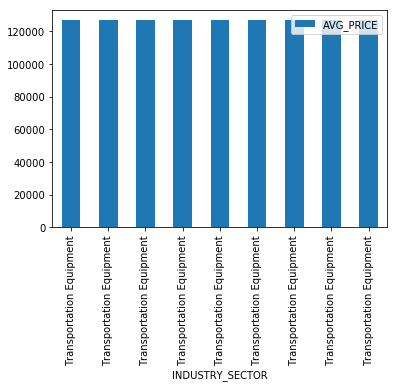

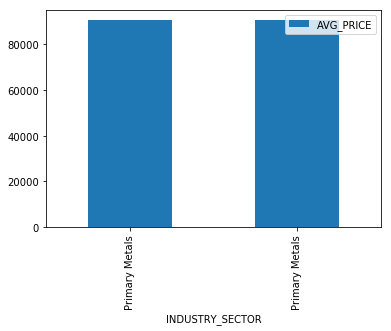

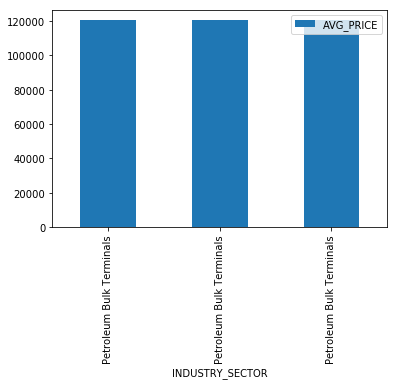

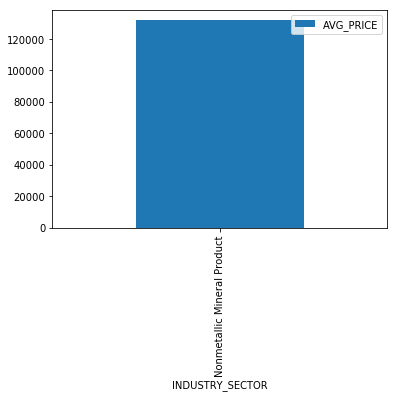

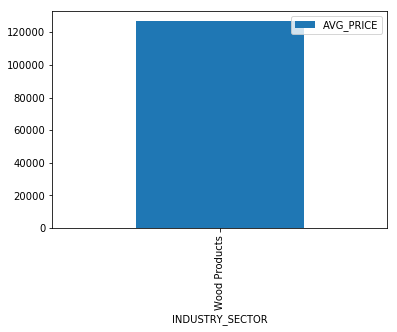

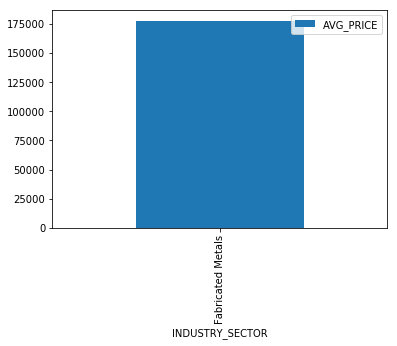

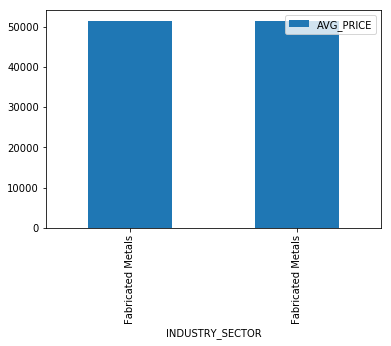

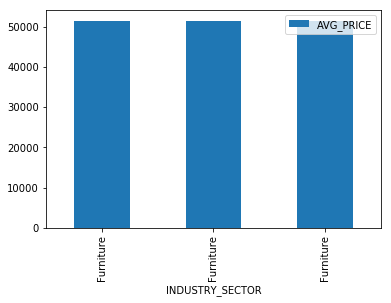

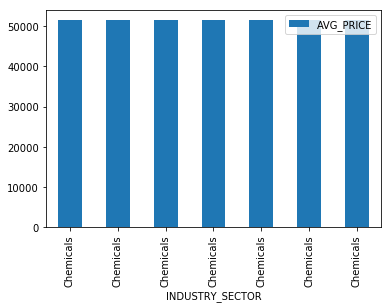

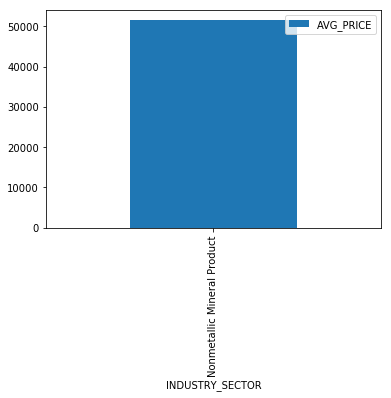

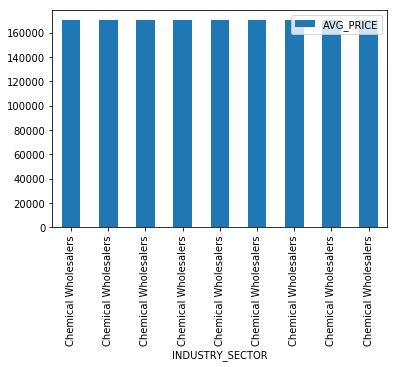

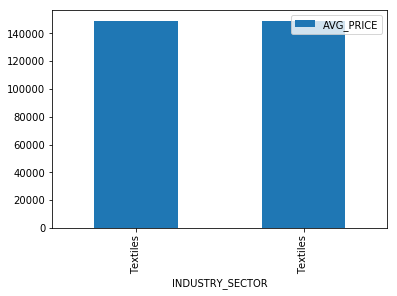

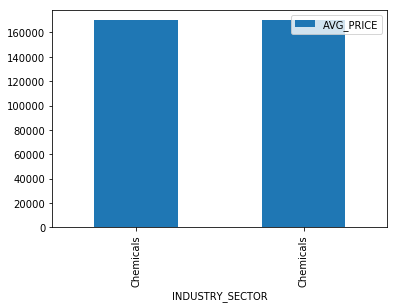

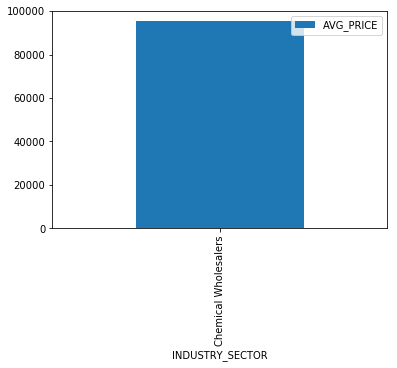

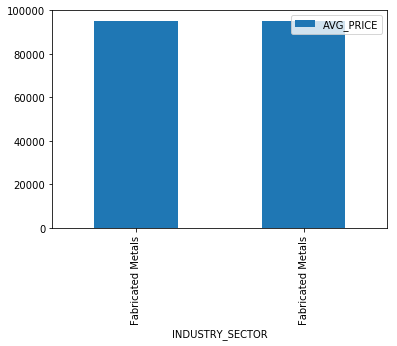

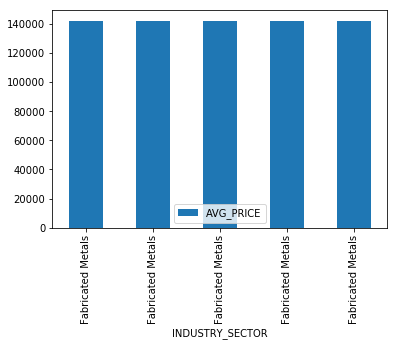

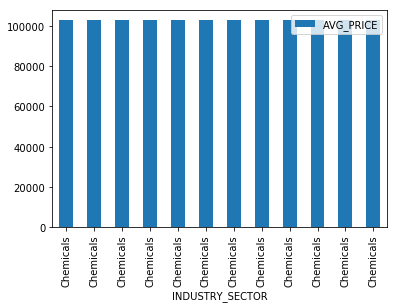

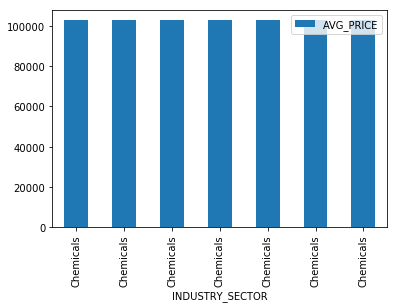

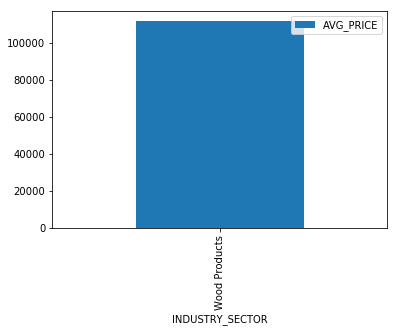

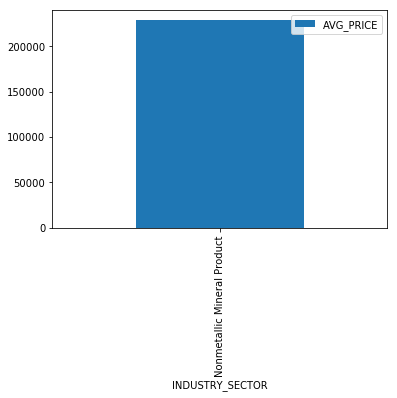

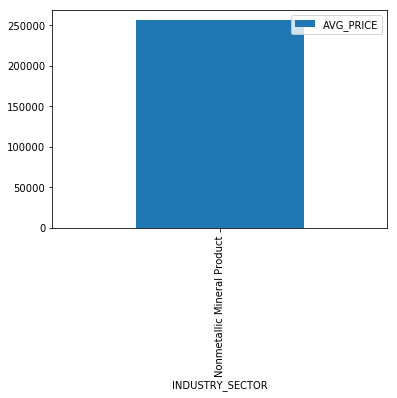

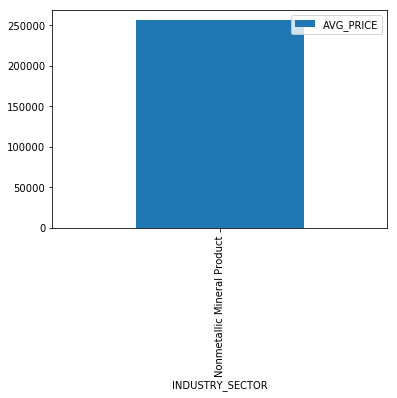

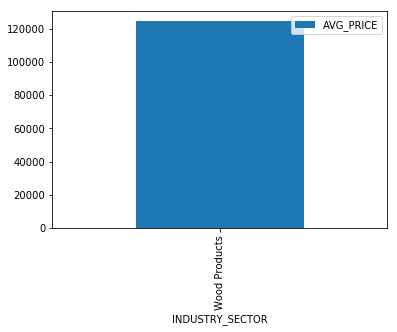

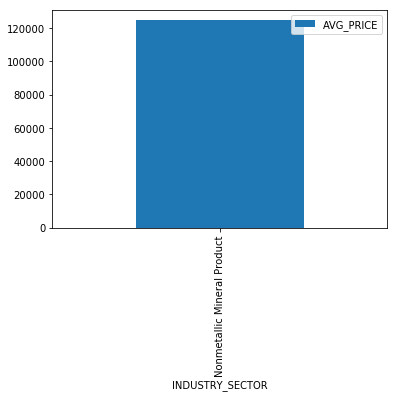

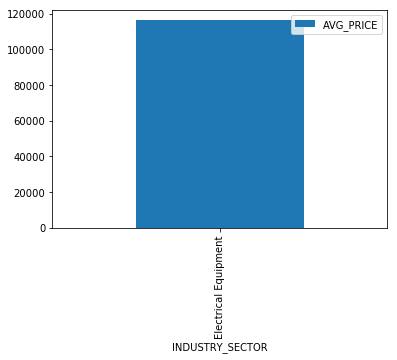

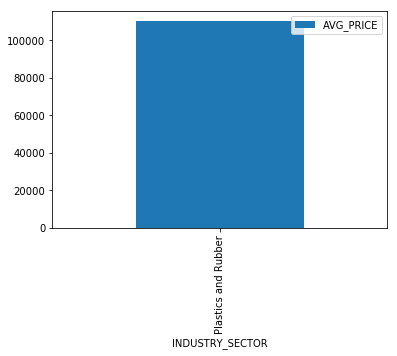

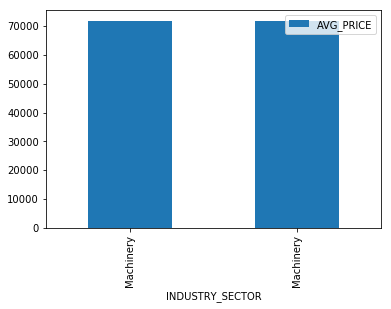

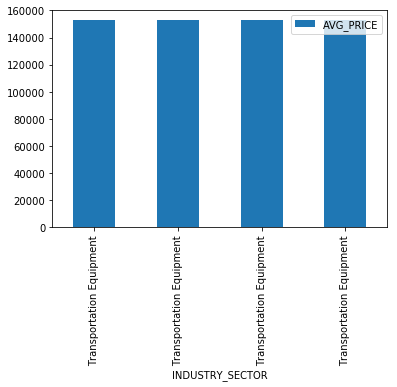

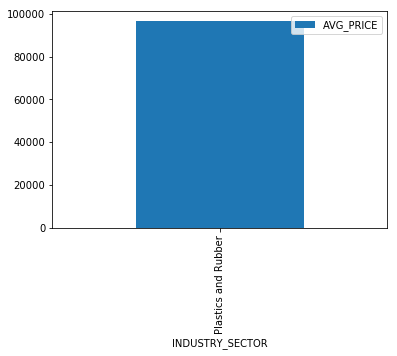

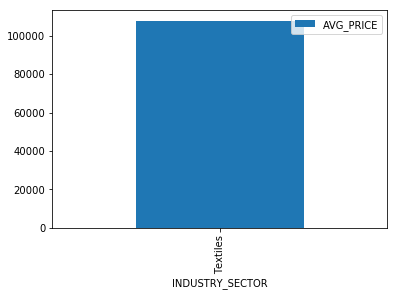

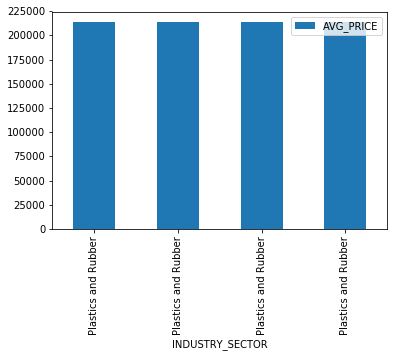

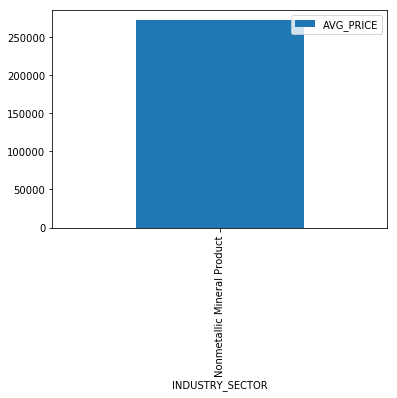

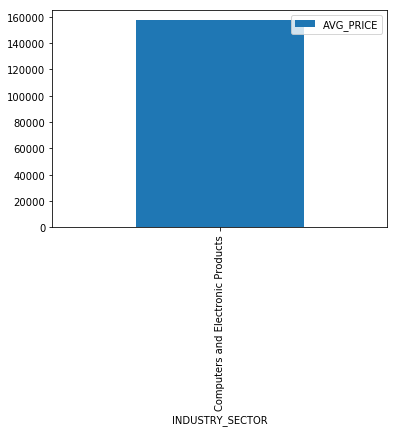

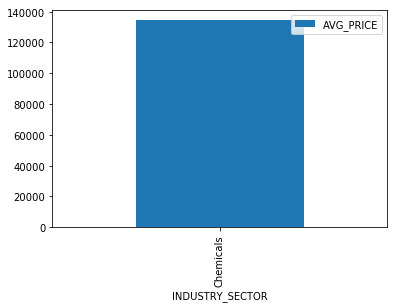

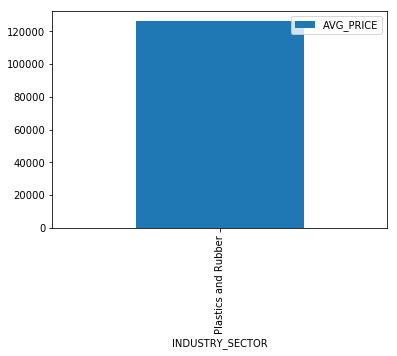

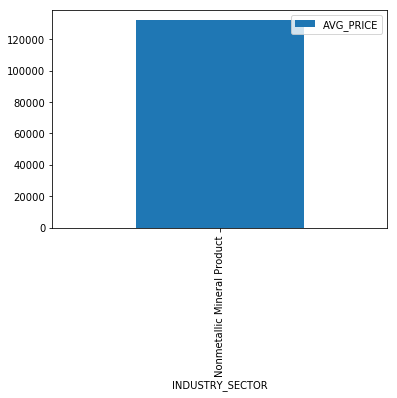

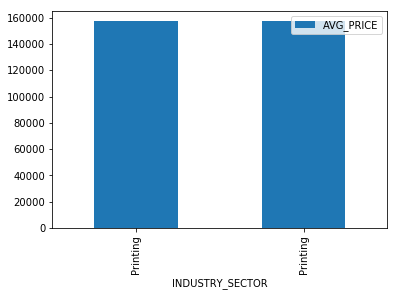

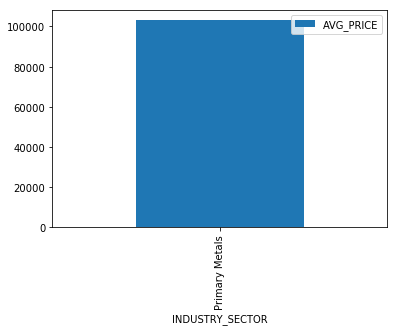

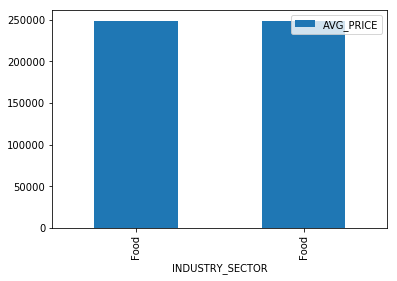

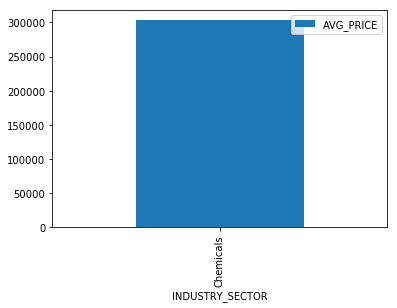

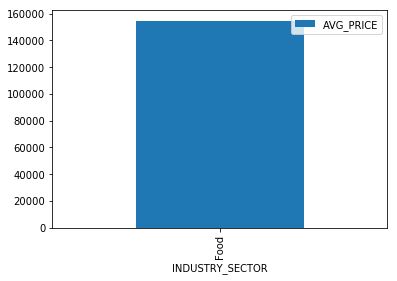

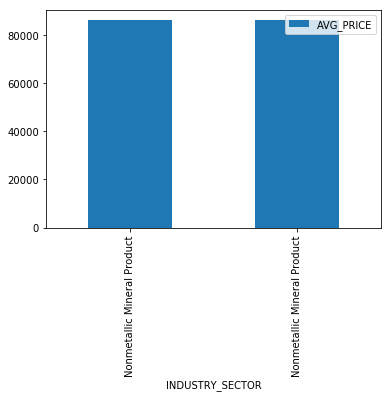

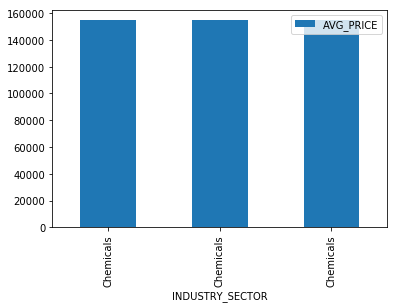

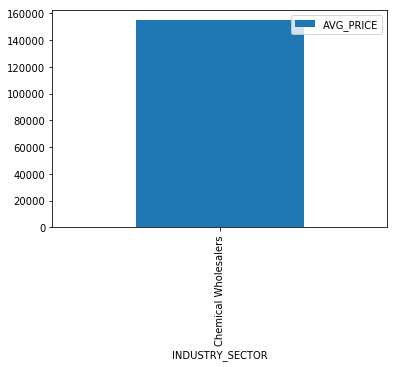

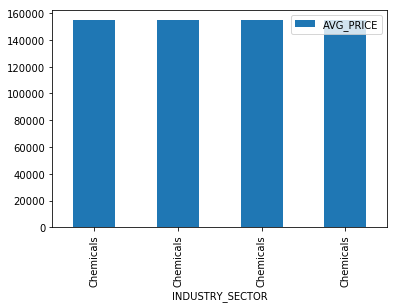

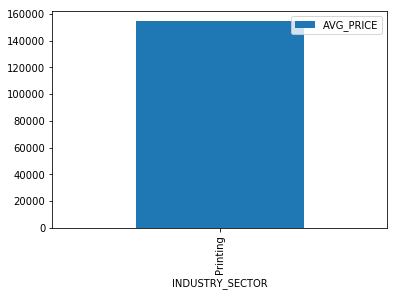

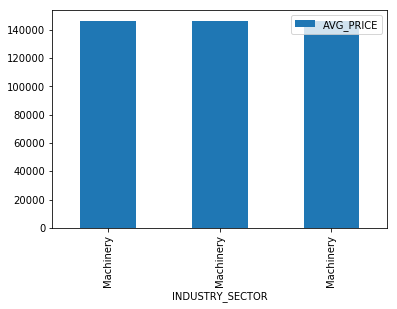

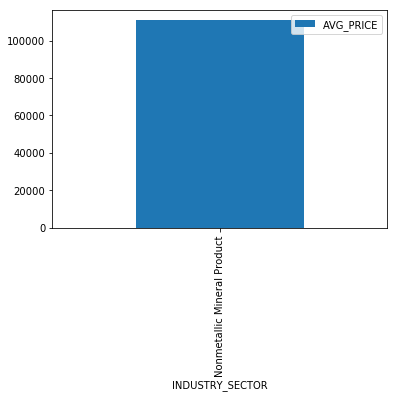

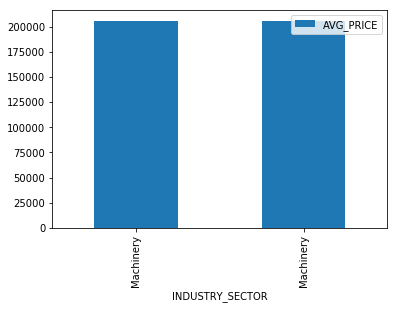

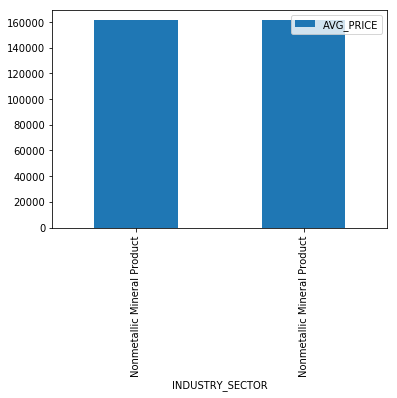

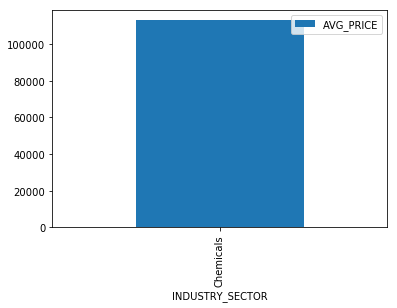

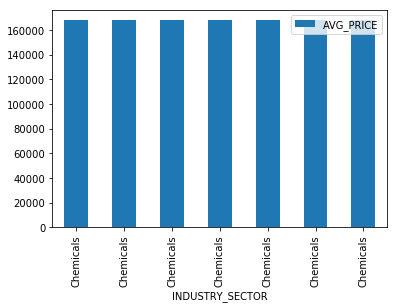

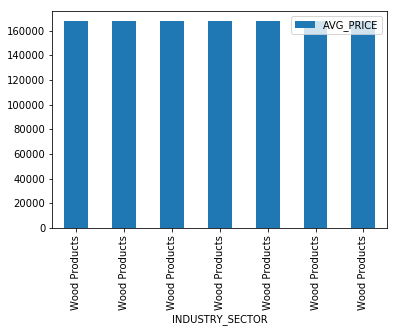

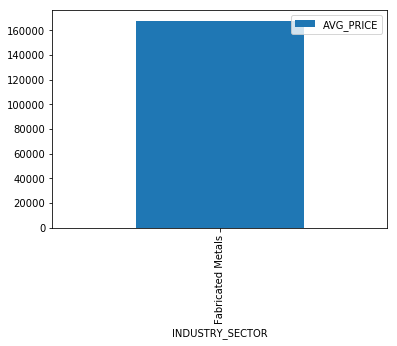

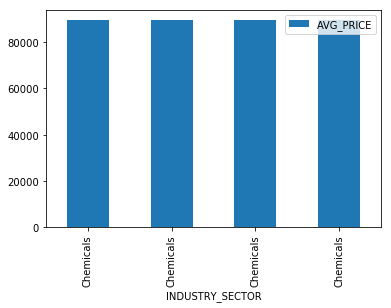

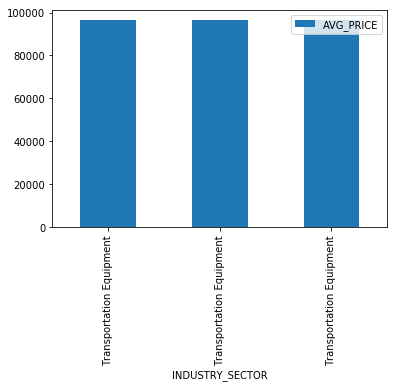

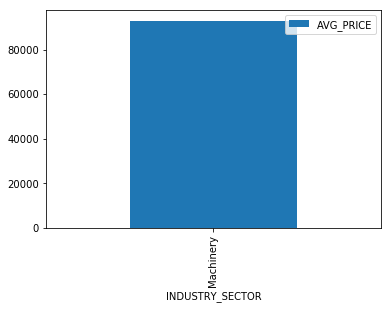

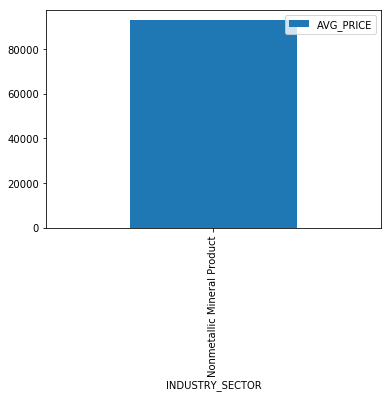

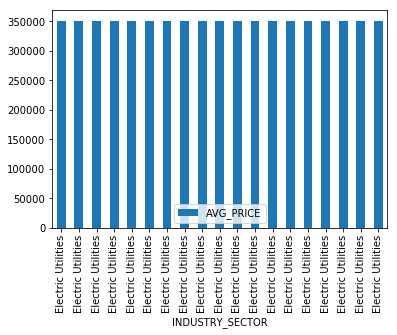

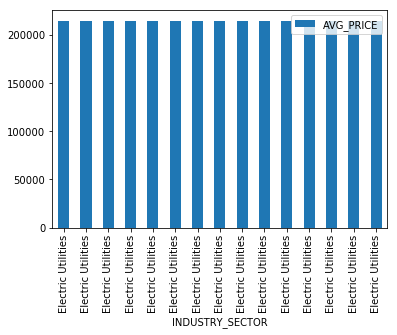

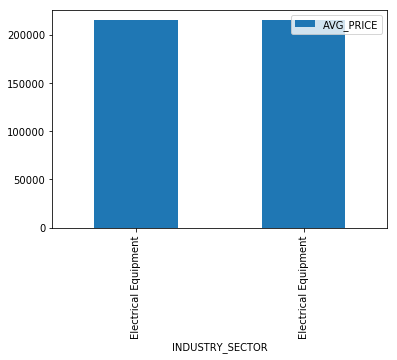

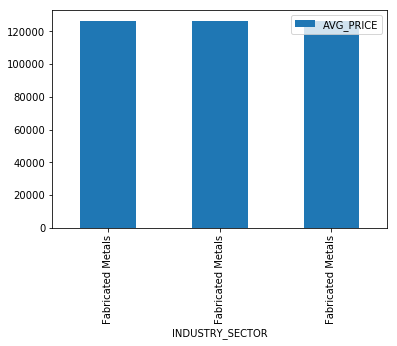

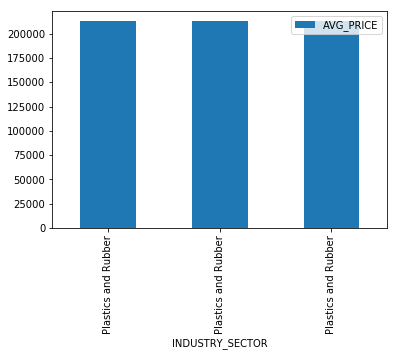

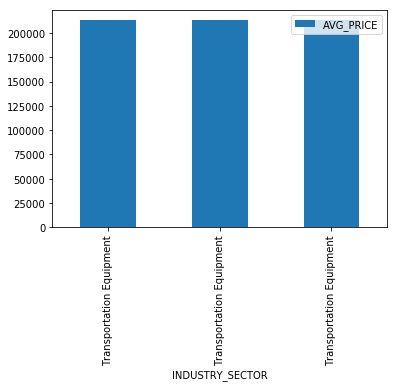

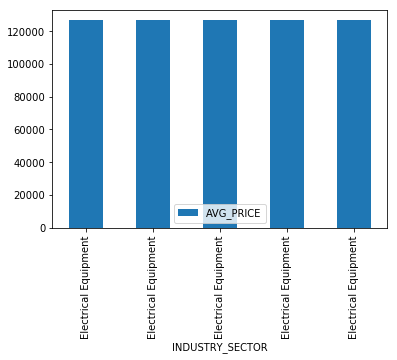

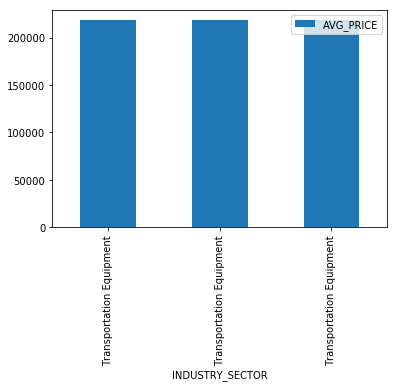

In [173]:
data_within_1_mile.groupby('TRI_FACILITY_ID').plot(x='INDUSTRY_SECTOR',y='AVG_PRICE',kind = 'bar')

INDUSTRY_SECTOR
Chemical Wholesalers                 Axes(0.125,0.125;0.775x0.755)
Chemicals                            Axes(0.125,0.125;0.775x0.755)
Computers and Electronic Products    Axes(0.125,0.125;0.775x0.755)
Electric Utilities                   Axes(0.125,0.125;0.775x0.755)
Electrical Equipment                 Axes(0.125,0.125;0.775x0.755)
Fabricated Metals                    Axes(0.125,0.125;0.775x0.755)
Food                                 Axes(0.125,0.125;0.775x0.755)
Furniture                            Axes(0.125,0.125;0.775x0.755)
Machinery                            Axes(0.125,0.125;0.775x0.755)
Nonmetallic Mineral Product          Axes(0.125,0.125;0.775x0.755)
Petroleum Bulk Terminals             Axes(0.125,0.125;0.775x0.755)
Plastics and Rubber                  Axes(0.125,0.125;0.775x0.755)
Primary Metals                       Axes(0.125,0.125;0.775x0.755)
Printing                             Axes(0.125,0.125;0.775x0.755)
Textiles                             Axes(0.12

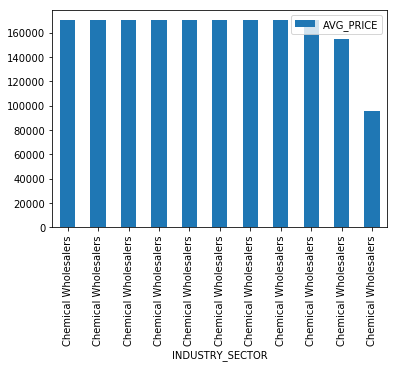

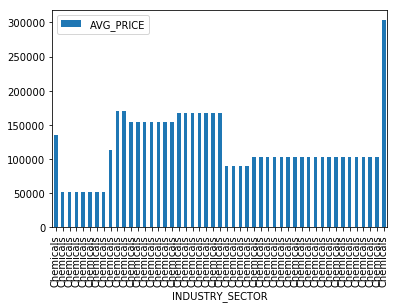

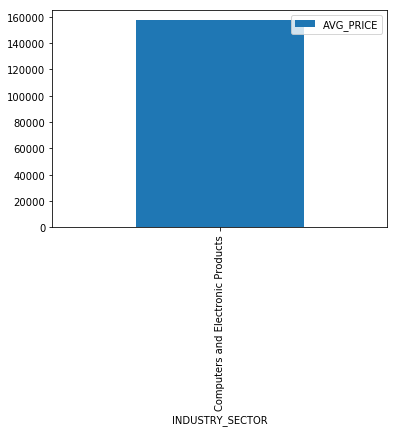

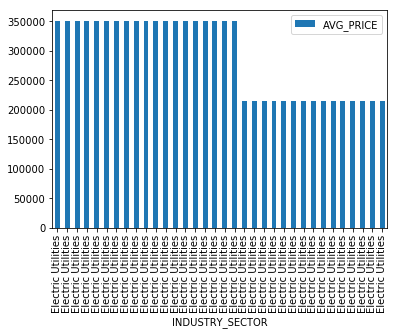

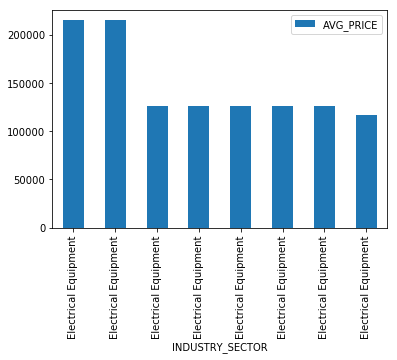

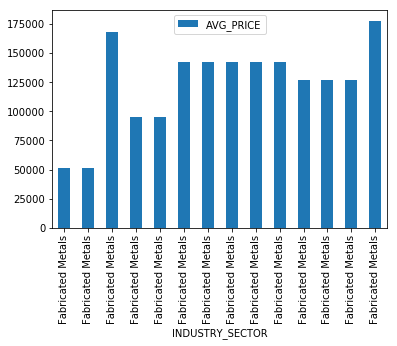

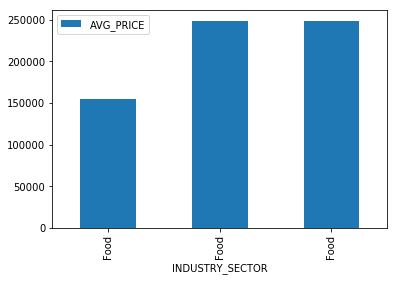

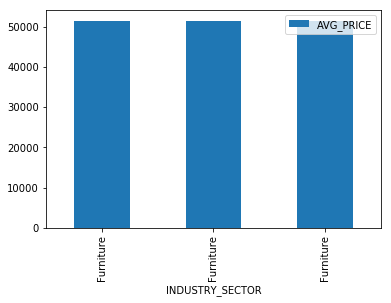

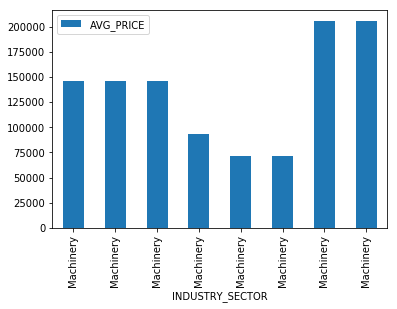

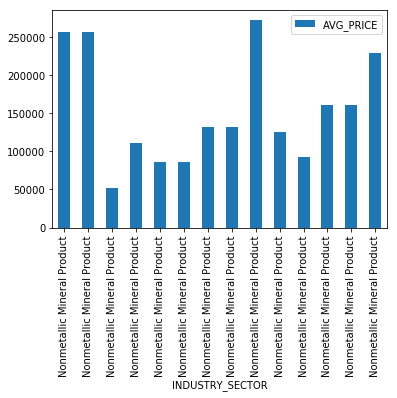

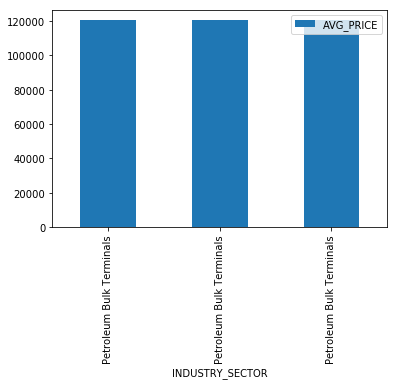

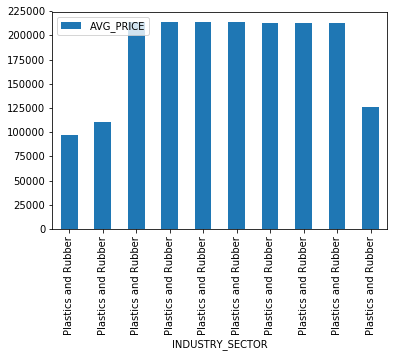

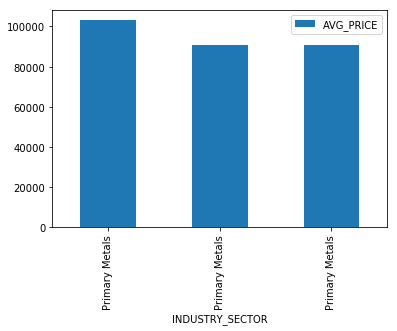

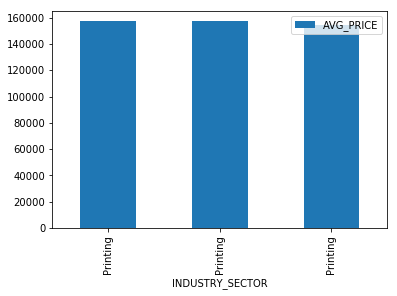

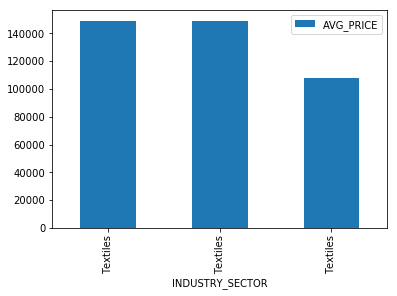

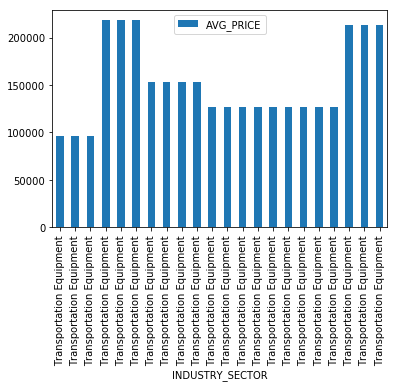

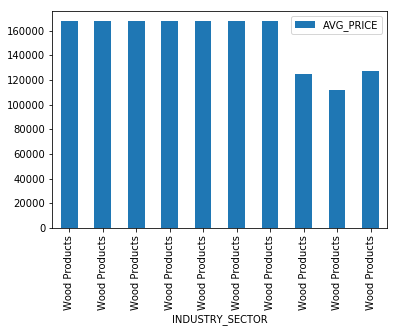

In [174]:
data_within_1_mile.groupby('INDUSTRY_SECTOR').plot(x='INDUSTRY_SECTOR',y='AVG_PRICE',kind = 'bar')

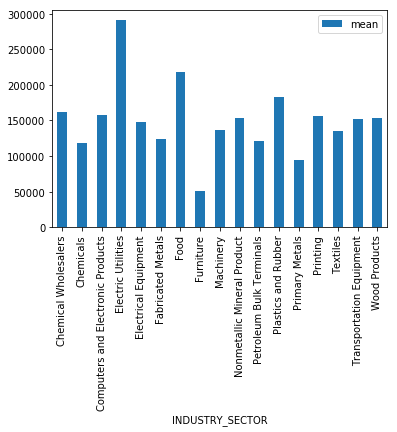

In [183]:
data_within_1_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

In [190]:
data_within_2_mile=data_common_tri_zillow_centroid[(data_common_tri_zillow_centroid.DIST_FROM_CENTROID >=1) & (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <2)]

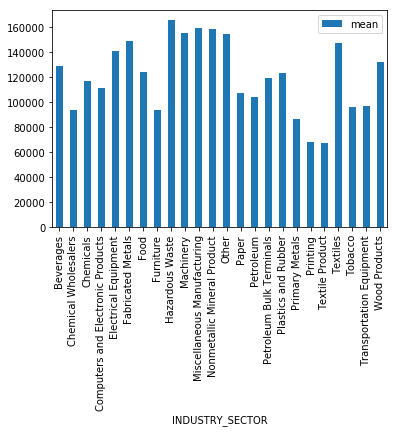

In [191]:
data_within_2_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

In [192]:
data_within_3_mile=data_common_tri_zillow_centroid[(data_common_tri_zillow_centroid.DIST_FROM_CENTROID >=2) & (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <3)]

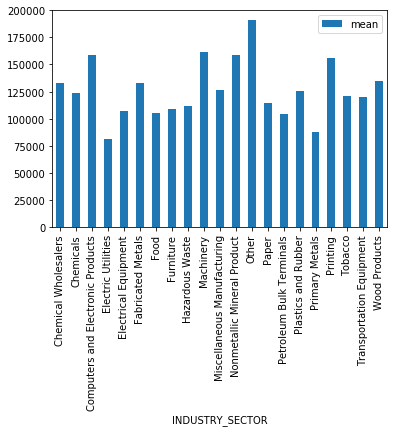

In [193]:
data_within_3_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

In [194]:
data_within_4_mile=data_common_tri_zillow_centroid[(data_common_tri_zillow_centroid.DIST_FROM_CENTROID >=3) & (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <4)]

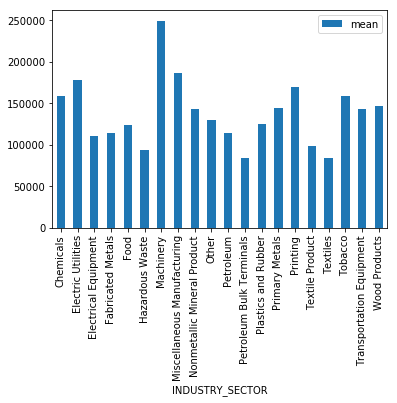

In [195]:
data_within_4_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

In [196]:
data_within_5_mile=data_common_tri_zillow_centroid[(data_common_tri_zillow_centroid.DIST_FROM_CENTROID >=4) & (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <5)]

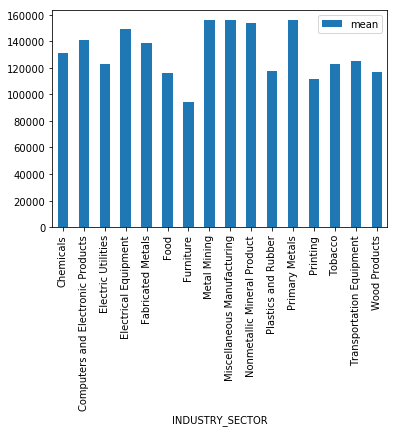

In [197]:
data_within_5_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

In [198]:
data_within_6_mile=data_common_tri_zillow_centroid[(data_common_tri_zillow_centroid.DIST_FROM_CENTROID >=5) & (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <6)]

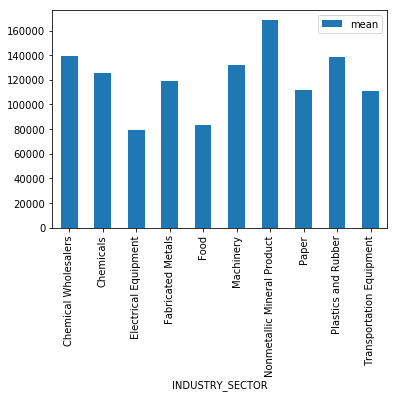

In [199]:
data_within_6_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

In [200]:
data_within_7_mile=data_common_tri_zillow_centroid[(data_common_tri_zillow_centroid.DIST_FROM_CENTROID >=6) & (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <7)]

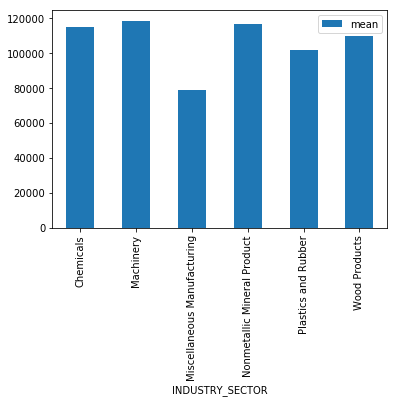

In [201]:
data_within_7_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

In [202]:
data_within_10_mile=data_common_tri_zillow_centroid[(data_common_tri_zillow_centroid.DIST_FROM_CENTROID >=7) & (data_common_tri_zillow_centroid.DIST_FROM_CENTROID <10)]

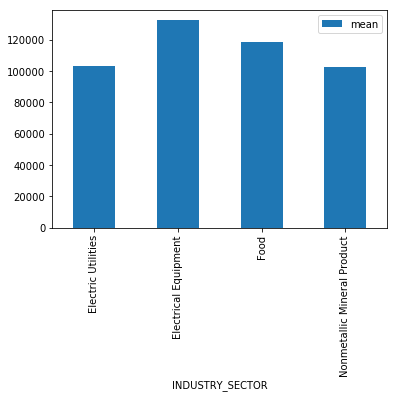

In [203]:
data_within_10_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'bar')

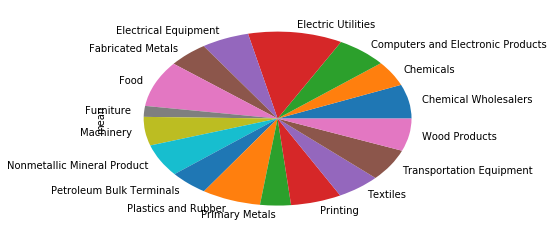

In [220]:
data_within_1_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'pie',legend = '' )

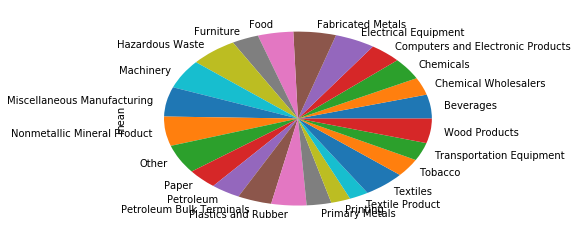

In [219]:
data_within_2_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'pie',legend = '' )

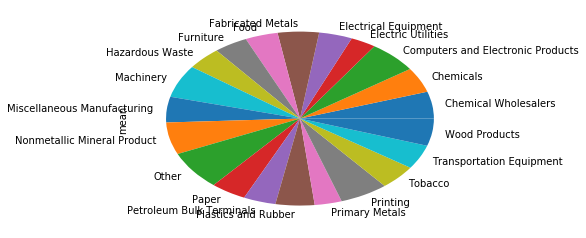

In [218]:
data_within_3_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'pie',legend = '' )

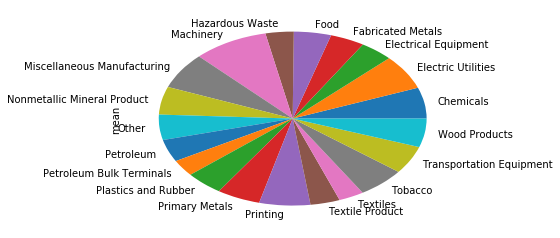

In [217]:
data_within_4_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'pie',legend = '' )

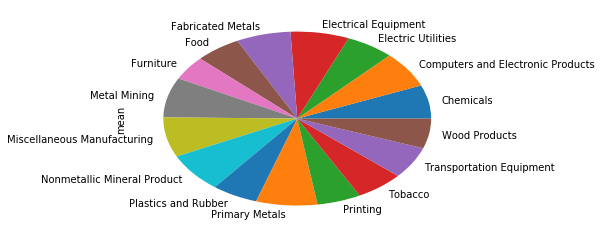

In [215]:
data_within_5_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'pie',legend='')

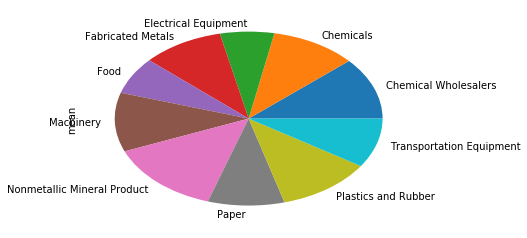

In [214]:
data_within_6_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'pie',legend = '' )

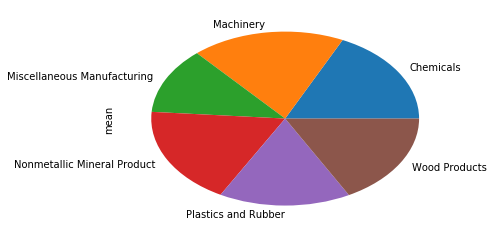

In [216]:
data_within_7_mile.groupby('INDUSTRY_SECTOR')['AVG_PRICE'].agg(['mean'],axis=1).plot(y='mean',kind = 'pie',legend = '' )